In [2]:
import os
from dataloading import dto, loadz

os.chdir(os.getcwd().split('/spnz')[0])
loadz.produce('.data')
dataset = dto.wds_load(".data/test_data.tar.xz") + dto.wds_load(".data/train_data.tar.xz")

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

  0%|          | 0/1680 [00:00<?, ?it/s]

  0%|          | 0/4620 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [2]:
loadz.calculate_phoneme_counts(dataset)
loadz.calculate_phoneme_counts(dataset, 16)

Counter()

[    0     0     0     0 35021 96416  6201 64787] [   0    5   10   20   30   50  100  105 9999]


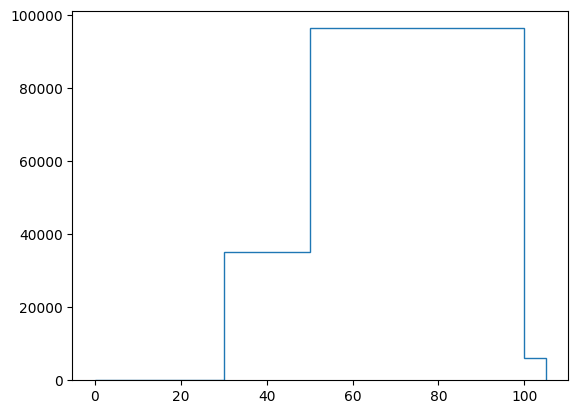

In [3]:
import numpy as np
import matplotlib.pyplot as plt

durations = [
    d
    for item in dataset
    for p, d in zip(item.phonetic_detail.utterance, item.phonetic_detail.duration)
]
counts, bins = np.histogram(durations, bins=[0, 5, 10, 20, 30, 50, 100, 105, 9999])
print(counts, bins)
plt.stairs(counts[:-1], bins[:-1])
plt.show()

0it [00:00, ?it/s]

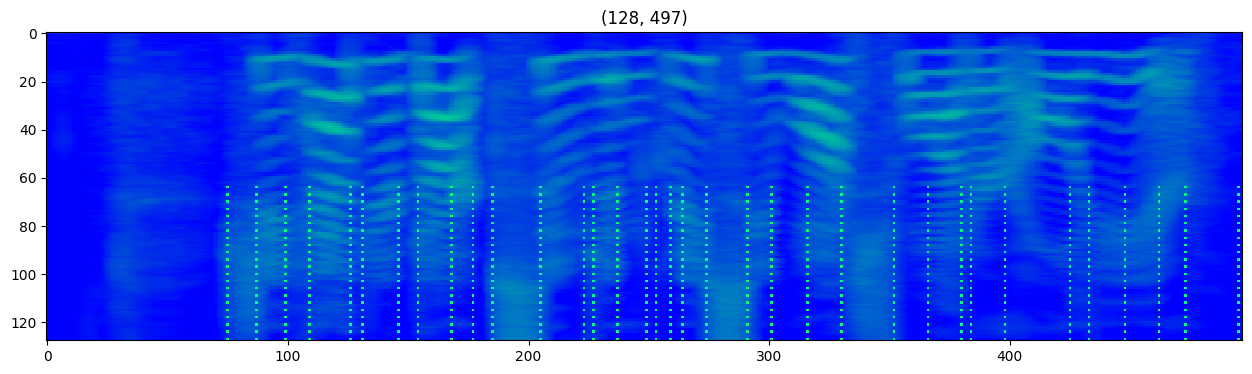

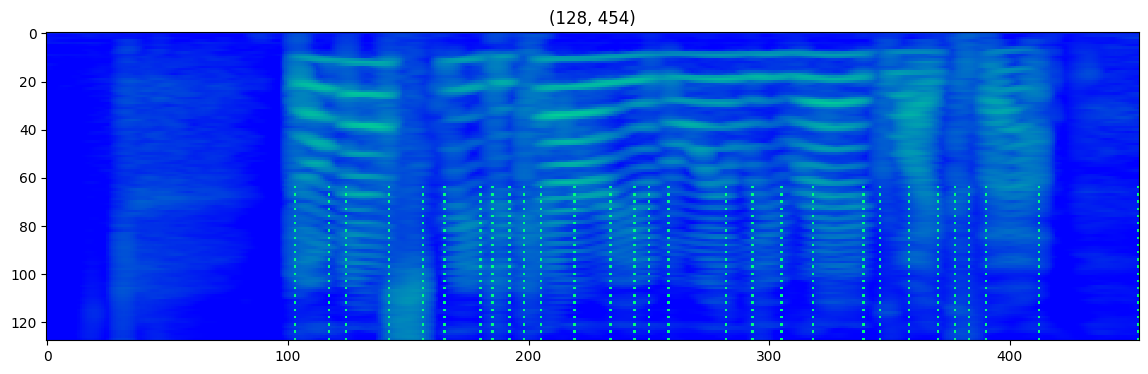

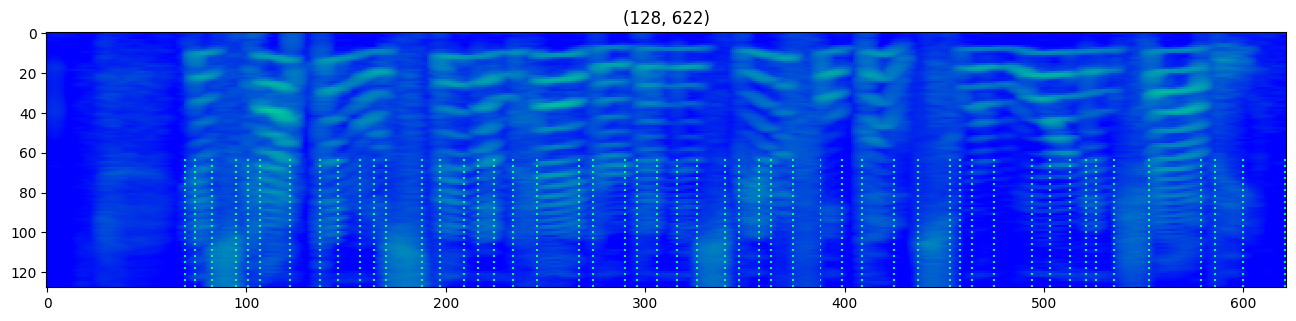

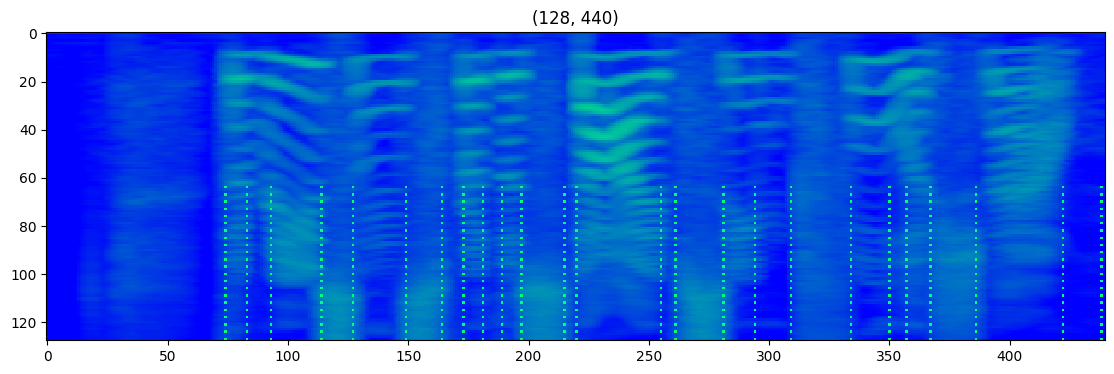

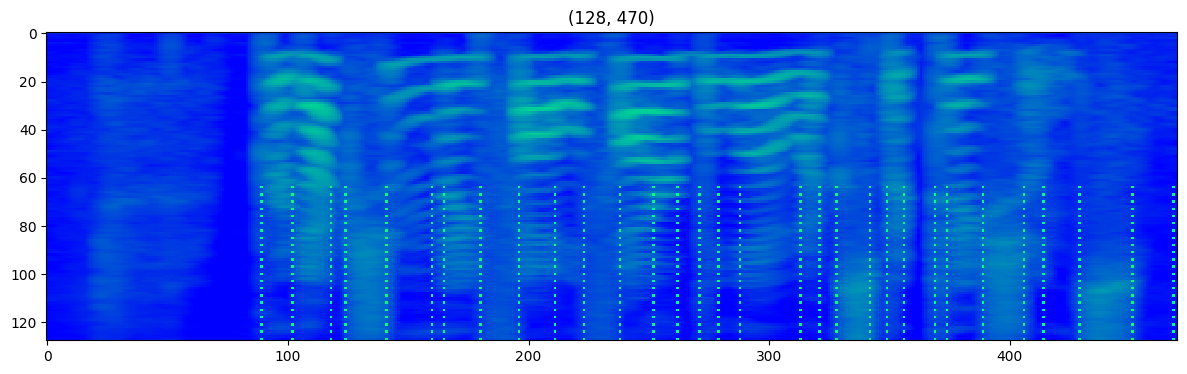

In [34]:
from dataloading.utils import spectogram, show_tensor

result = dto.wds_load(".data/test_data.tar.xz")

for i in range(5):
    data = result[i]

    logmel = spectogram(data.audio)
    val = logmel.max() * 2
    for word, stop_ms in zip(data.phonetic_detail.utterance, data.phonetic_detail.stop):
        logmel[64::3, int(stop_ms / (128 / data.msr))] = val

    show_tensor(logmel, limit=False, figsize=(16, 4))

In [1]:
from spnz.model import Thing
import os

os.chdir(os.getcwd().split('/spnz')[0])
module = Thing.load_from_checkpoint("panns128.ckpt", strict=False)

/home/fred/.cache/pypoetry/virtualenvs/soft-pointer-network-OI7XEqck-py3.10/lib/python3.10/site-packages/torchlibrosa/stft.py:193: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = librosa.util.pad_center(fft_window, n_fft)
/home/fred/.cache/pypoetry/virtualenvs/soft-pointer-network-OI7XEqck-py3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


ms_per_step 256.0


history_size 2
ms_per_step 64.0


/home/fred/.cache/pypoetry/virtualenvs/soft-pointer-network-OI7XEqck-py3.10/lib/python3.10/site-packages/torchlibrosa/stft.py:193: FutureWarning: Pass size=1024 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  fft_window = librosa.util.pad_center(fft_window, n_fft)
/home/fred/.cache/pypoetry/virtualenvs/soft-pointer-network-OI7XEqck-py3.10/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


128


0it [00:00, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

FileBatch[16]
	Audio[2112.0, 2509.0, 2054.0, 3053.0, 3386.0, 2669.0, 3072.0, 3021.0, 3187.0, 2963.0, 3379.0, 3859.0, 4877.0, 3603.0, 4128.0, 5376.0]
	Phoneme[16, 23, 24, 24, 27, 30, 30, 30, 31, 32, 35, 38, 41, 43, 51, 60]
	Word[5, 7, 6, 7, 6, 10, 10, 4, 10, 9, 7, 11, 11, 12, 16, 13]
	Output['output_timestamps']
torch.Size([16, 86017])
torch.Size([16, 60])

TRAIN/DR1/FDML0/SI2075
[ 137.  159.  277.  378.  432.  472.  632.  837.  885.  927.  992. 1092.
 1272. 1316. 1454. 1600.] (16,)
[ 136.  158.  277.  379.  438.  498.  641.  834.  890.  924.  994. 1098.
 1266. 1313. 1459.    0.] (16,)
[   1    1    0   -1   -6  -26   -9    3   -5    3   -2   -6    6    3
   -5 1600]
5.142857142857143
['pau', 'n', 'aw', 'f', 'ih', 'pau', 'eh', 'aa', 'l', 'dh', 'ih', 's', 'ah', 'dh', 'er', 'pau']


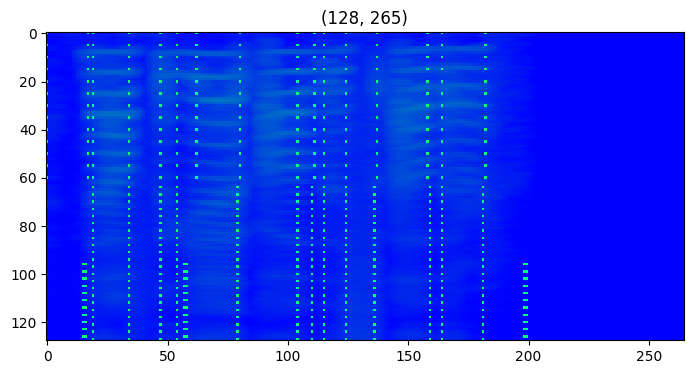

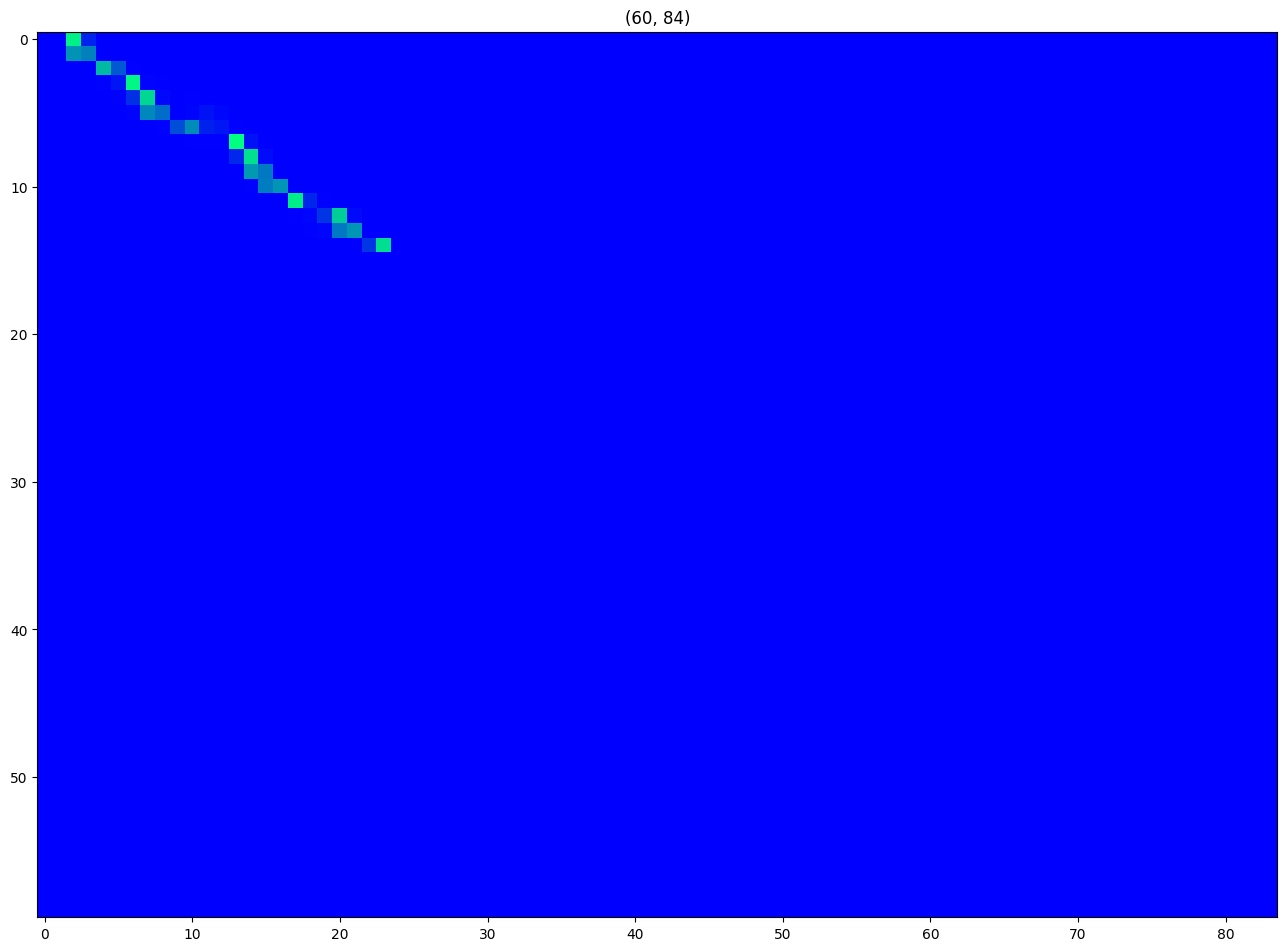


TRAIN/DR1/FDAW0/SI1406
[ 125.  162.  237.  366.  490.  540.  606.  658.  695.  813. 1011. 1051.
 1190. 1350. 1415. 1528. 1669. 1727. 1878. 1912. 2046. 2272. 2382. 2540.] (24,)
[ 127.  160.  238.  362.  496.  538.  601.  653.  692.  816. 1012. 1047.
 1182. 1345. 1417. 1528. 1667. 1743. 1872. 1911. 2046. 2273. 2384.    0.] (24,)
[  -2    2   -1    4   -6    2    5    5    3   -3   -1    4    8    5
   -2    0    2  -16    6    1    0   -1   -2 2540]
3.590909090909091
['pau', 'r', 'iy', 's', 'iy', 'v', 'ih', 'ng', 'n', 'ow', 'ae', 'n', 's', 'er', 'dh', 'ey', 's', 'eh', 'dh', 'ih', 'f', 'ay', 'er', 'pau']


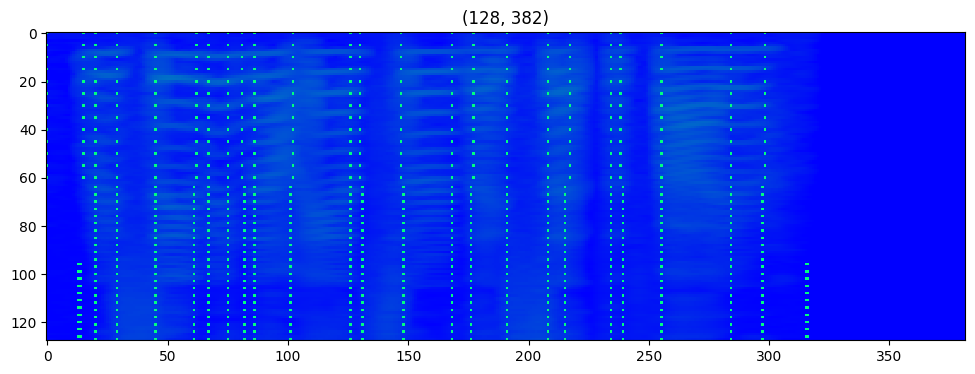

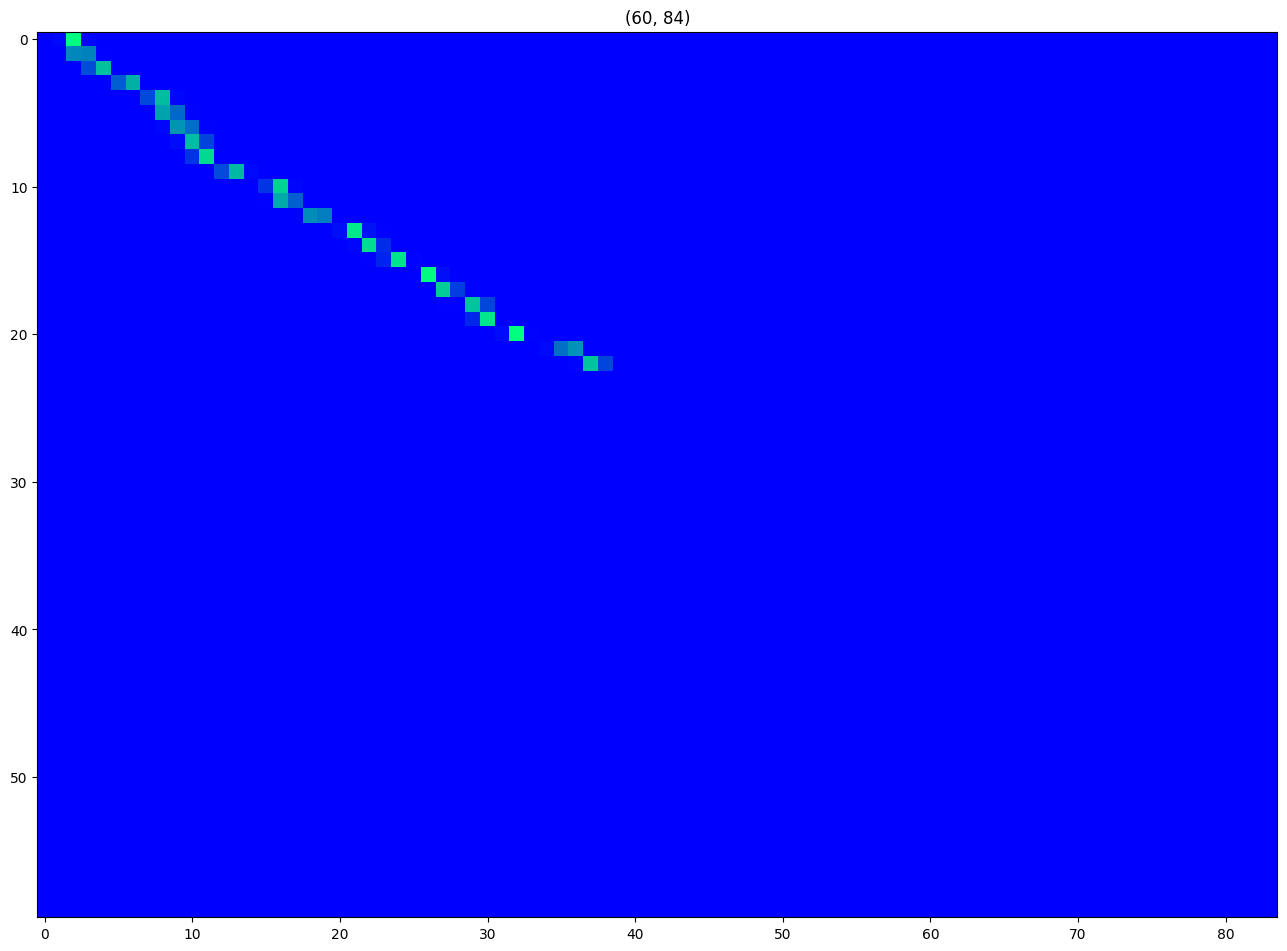


TRAIN/DR1/FDML0/SA2
[ 132.  172.  262.  312.  428.  497.  556.  573.  619.  658.  698.  770.
  838.  942.  997. 1076. 1115. 1156. 1376. 1420. 1493. 1600. 1778. 1852.
 1904. 1998. 2084. 2108. 2286. 2560.] (30,)
[ 138.  172.  260.  313.  426.  496.  559.  572.  617.  653.  691.  767.
  836.  942. 1006. 1083. 1117. 1166. 1380. 1424. 1494. 1590. 1782. 1853.
 1905. 1991. 2078. 2107. 2317.    0.] (30,)
[  -6    0    2   -1    2    1   -3    1    2    5    7    3    2    0
   -9   -7   -2  -10   -4   -4   -1   10   -4   -1   -1    7    6    1
  -31 2560]
3.642857142857143
['pau', 'd', 'ow', 'n', 'ae', 's', 'pau', 'm', 'iy', 'dx', 'ih', 'pau', 'k', 'ae', 'r', 'iy', 'ih', 'n', 'oy', 'l', 'iy', 'r', 'ae', 'pau', 'l', 'ay', 'pau', 'dh', 'ae', 'pau']


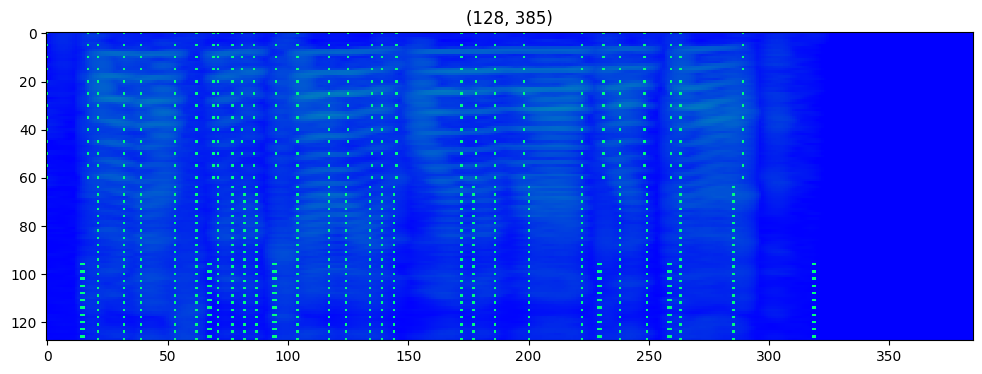

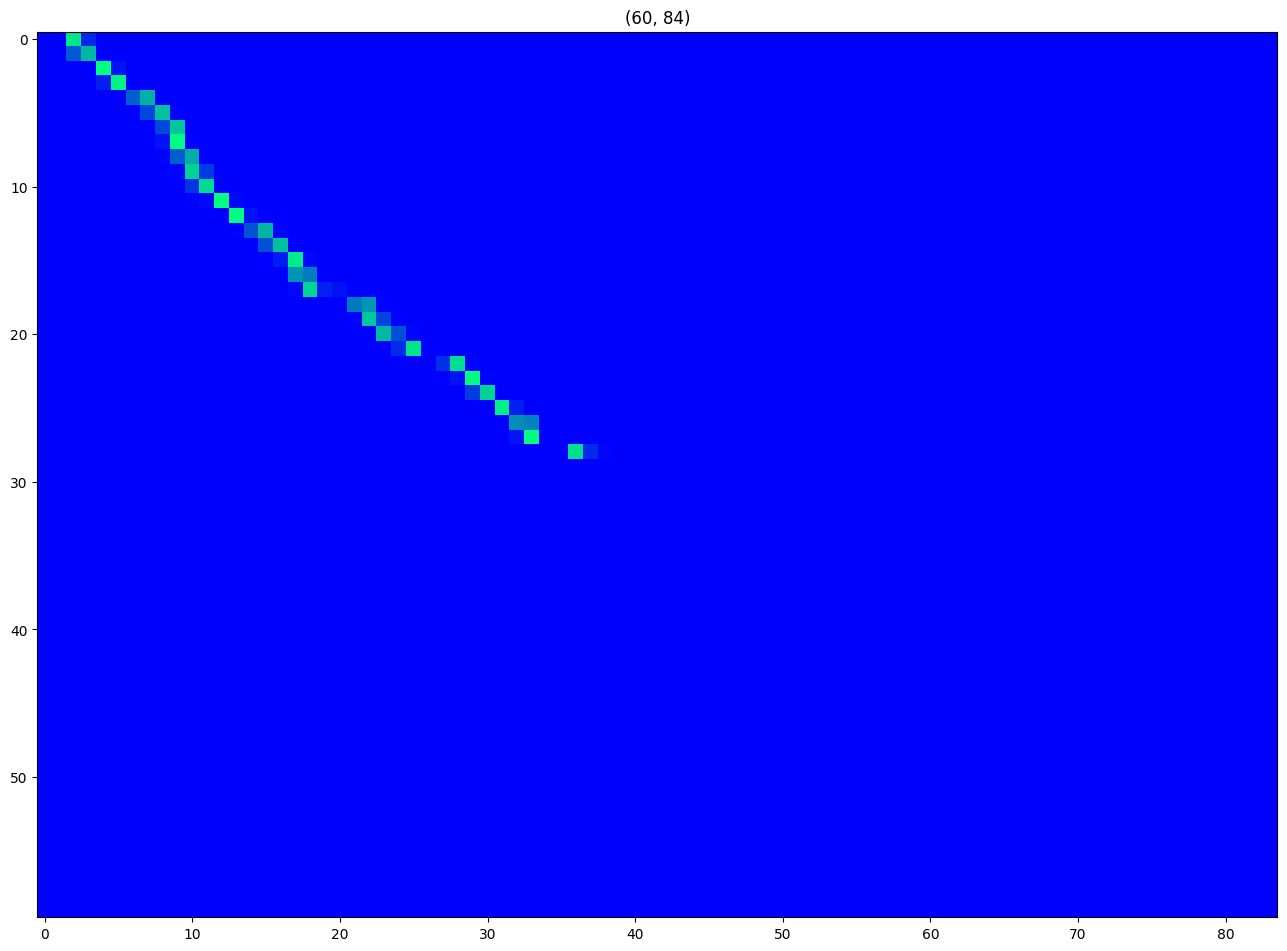


TRAIN/DR1/FDAW0/SX236
[ 172.  235.  275.  354.  398.  474.  514.  533.  585.  721.  767.  871.
  953. 1103. 1240. 1285. 1378. 1524. 1606. 1642. 1708. 1775. 1817. 1901.
 2046. 2146. 2282. 2319. 2388. 2505.] (30,)
[ 171.  234.  272.  348.  398.  472.  511.  531.  583.  723.  770.  866.
  947. 1100. 1238. 1286. 1397. 1524. 1606. 1647. 1708. 1775. 1814. 1901.
 2053. 2147. 2281. 2315. 2391.    0.] (30,)
[   1    1    3    6    0    2    3    2    2   -2   -3    5    6    3
    2   -1  -19    0    0   -5    0    0    3    0   -7   -1    1    4
   -3 2505]
2.9285714285714284
['pau', 'k', 'l', 'ih', 'r', 'pau', 'p', 'ih', 'n', 'aw', 'n', 's', 'iy', 'ey', 'sh', 'ih', 'n', 'ih', 'z', 'ih', 'pau', 'p', 'r', 'iy', 'sh', 'iy', 'ey', 'dx', 'ih', 'pau']


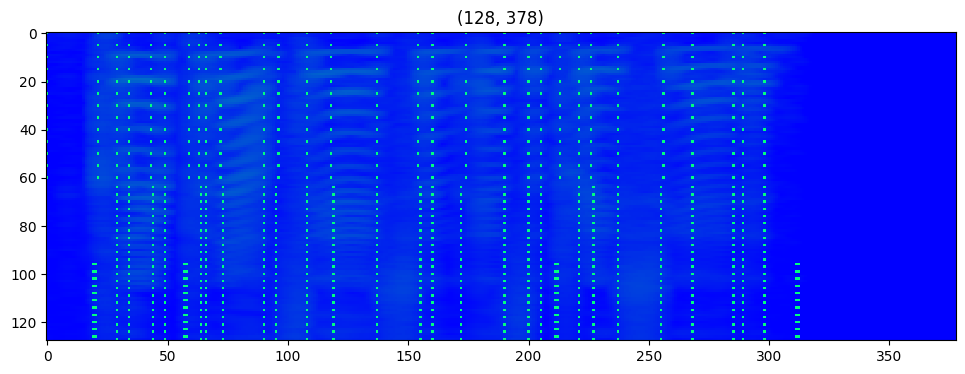

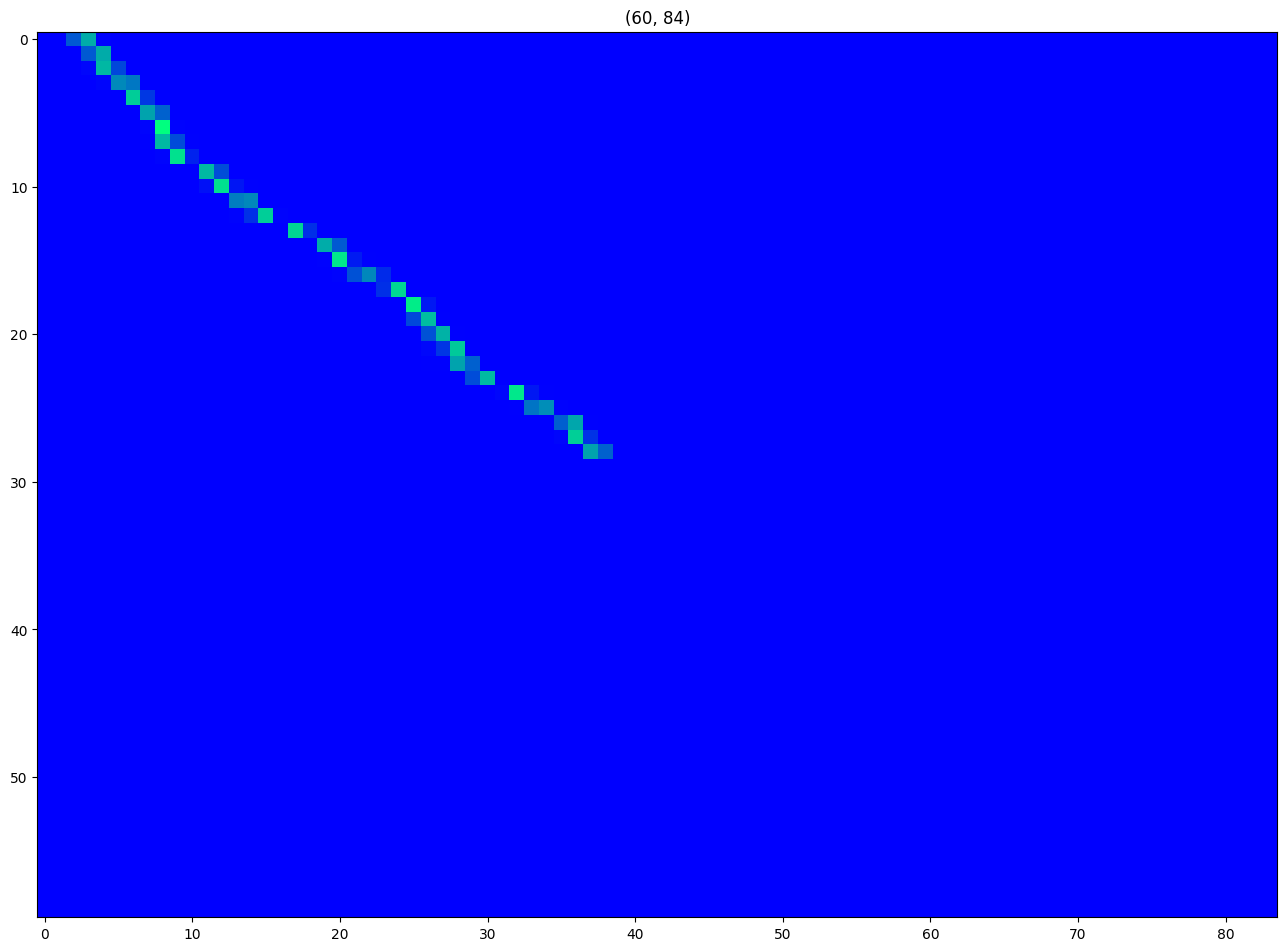


TRAIN/DR1/FCJF0/SX397
[ 140.  184.  279.  346.  366.  411.  513.  538.  694.  796.  862.  919.
  974.  987. 1180. 1233. 1324. 1442. 1506. 1579. 1650. 1671. 1738. 1779.
 1862. 1951. 1987. 2071. 2192. 2289. 2324. 2445.] (32,)
[ 139.  185.  297.  353.  372.  415.  514.  542.  692.  798.  859.  920.
  968.  991. 1179. 1229. 1319. 1446. 1512. 1581. 1653. 1667. 1738. 1776.
 1856. 1949. 1987. 2068. 2192. 2285. 2329.    0.] (32,)
[   1   -1  -18   -7   -6   -4   -1   -4    2   -2    3   -1    6   -4
    1    4    5   -4   -6   -2   -3    4    0    3    6    2    0    3
    0    4   -5 2445]
3.566666666666667
['pau', 't', 'ih', 'm', 'pau', 't', 'ey', 'pau', 'sh', 'iy', 'l', 'ih', 'pau', 't', 's', 'ih', 'm', 'uw', 'v', 'ih', 'z', 'pau', 't', 'w', 'ay', 's', 'ah', 'w', 'iy', 'pau', 'k', 'pau']


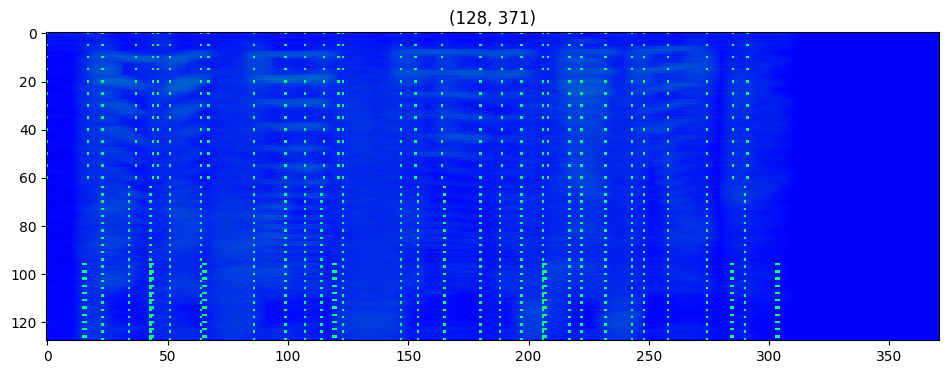

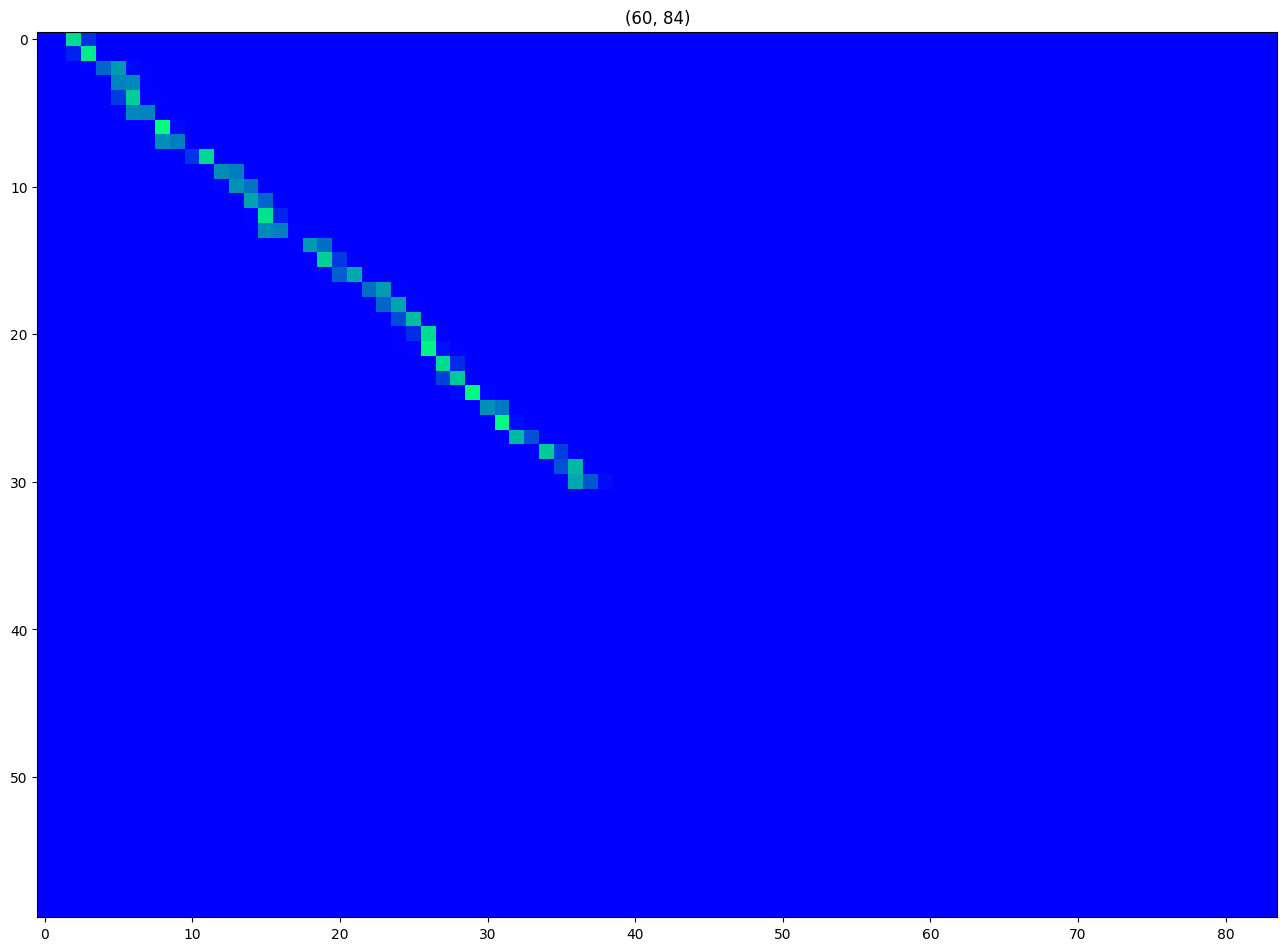


TRAIN/DR1/FDML0/SX159
[ 138.  158.  193.  228.  268.  342.  402.  520.  577.  611.  655.  744.
  873. 1162. 1258. 1308. 1382. 1452. 1598. 1708. 1744. 1800. 1867. 1924.
 1987. 2047. 2178. 2219. 2238. 2322. 2428. 2538. 2652. 2735. 2865.] (35,)
[ 139.  161.  191.  237.  264.  345.  404.  519.  577.  619.  661.  744.
  876. 1157. 1253. 1292. 1372. 1445. 1595. 1709. 1743. 1796. 1865. 1923.
 1982. 2049. 2178. 2225. 2248. 2325. 2429. 2541. 2653. 2735.    0.] (35,)
[  -1   -3    2   -9    4   -3   -2    1    0   -8   -6    0   -3    5
    5   16   10    7    3   -1    1    4    2    1    5   -2    0   -6
  -10   -3   -1   -3   -1    0 2865]
3.878787878787879
['pau', 'dh', 'ah', 'pau', 'g', 'ah', 'v', 'm', 'ih', 'n', 'pau', 's', 'aa', 'aa', 'th', 'r', 'ih', 'z', 'ey', 'sh', 'ih', 'n', 'ah', 'v', 'hh', 'ih', 's', 'ih', 'dx', 'ih', 'z', 'n', 'sh', 'ih', 'pau']


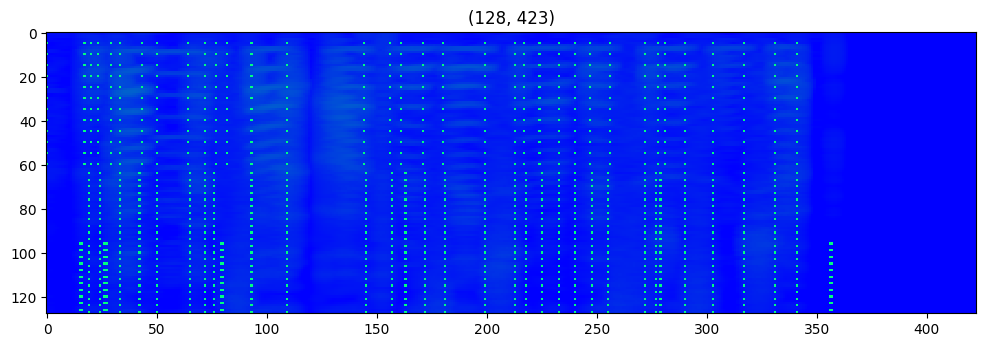

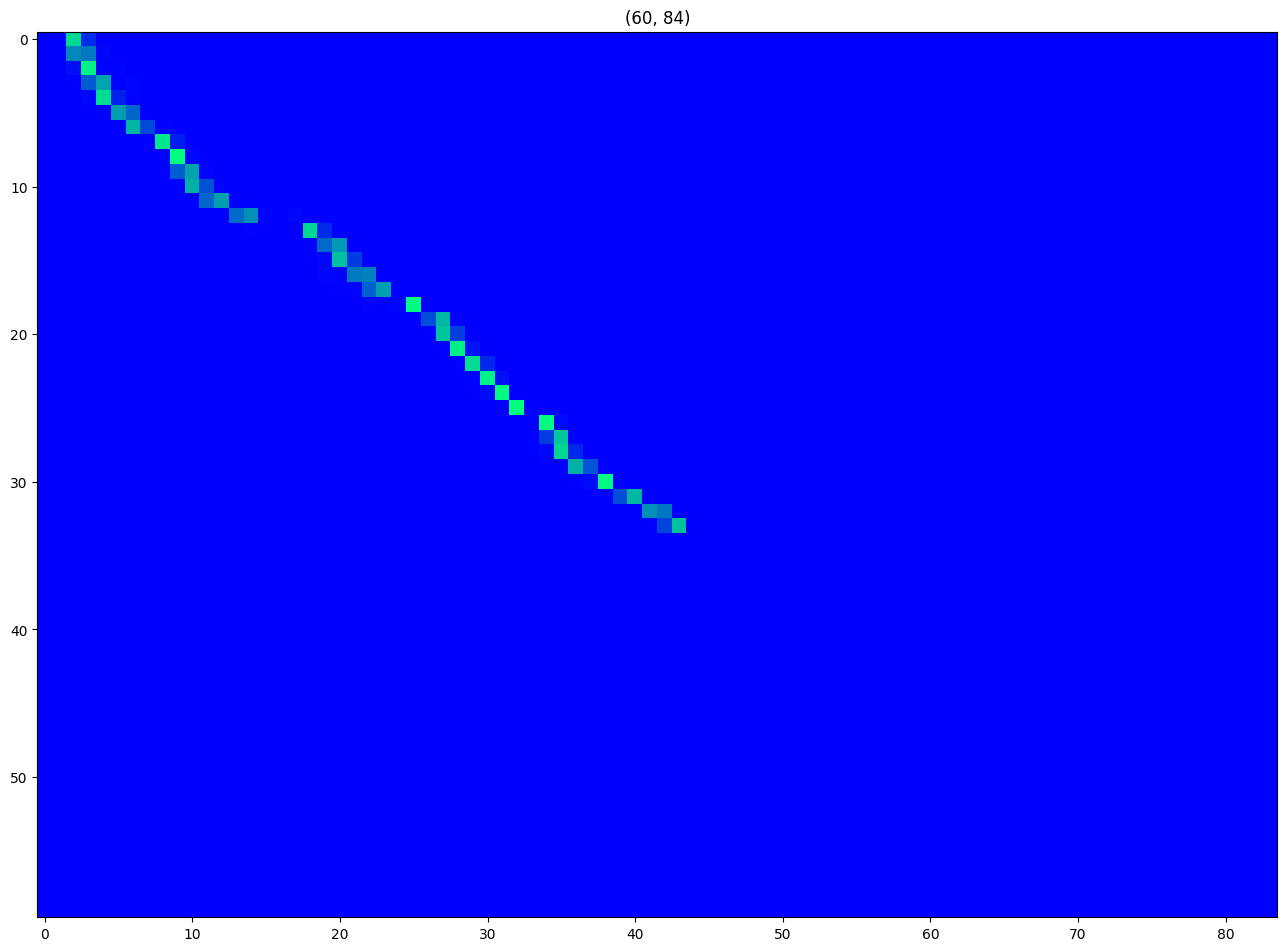


TRAIN/DR1/FECD0/SA1
[ 140.  292.  386.  480.  648.  700.  752.  843.  976. 1098. 1486. 1502.
 1632. 1702. 1774. 1805. 1954. 2138. 2180. 2256. 2328. 2381. 2419. 2462.
 2542. 2678. 2743. 2821. 2990. 3089. 3140. 3196. 3296. 3338. 3422. 3631.
 3709. 3858. 3965. 4082. 4360.] (41,)
[ 142.  293.  386.  477.  647.  701.  750.  841.  980. 1096. 1489. 1501.
 1629. 1697. 1772. 1789. 1955. 2131. 2181. 2245. 2327. 2373. 2416. 2462.
 2542. 2680. 2750. 2826. 2984. 3088. 3139. 3199. 3302. 3345. 3434. 3643.
 3714. 3837. 3967. 4085.    0.] (41,)
[  -2   -1    0    3    1   -1    2    2   -4    2   -3    1    3    5
    2   16   -1    7   -1   11    1    8    3    0    0   -2   -7   -5
    6    1    1   -3   -6   -7  -12  -12   -5   21   -2   -3 4360]
4.358974358974359
['pau', 'sh', 'iy', 'hh', 'ae', 'pau', 'd', 'y', 'aa', 'er', 'pau', 'd', 'aa', 'r', 'pau', 'k', 's', 'uw', 'pau', 'ih', 'ng', 'pau', 'g', 'r', 'iy', 's', 'ih', 'w', 'aa', 'sh', 'pau', 'w', 'aa', 'dx', 'ah', 'aa', 'l', 'y', 'ih', 'er', 'pa

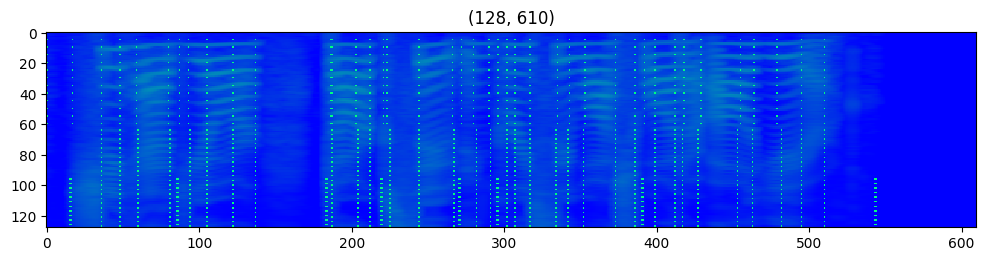

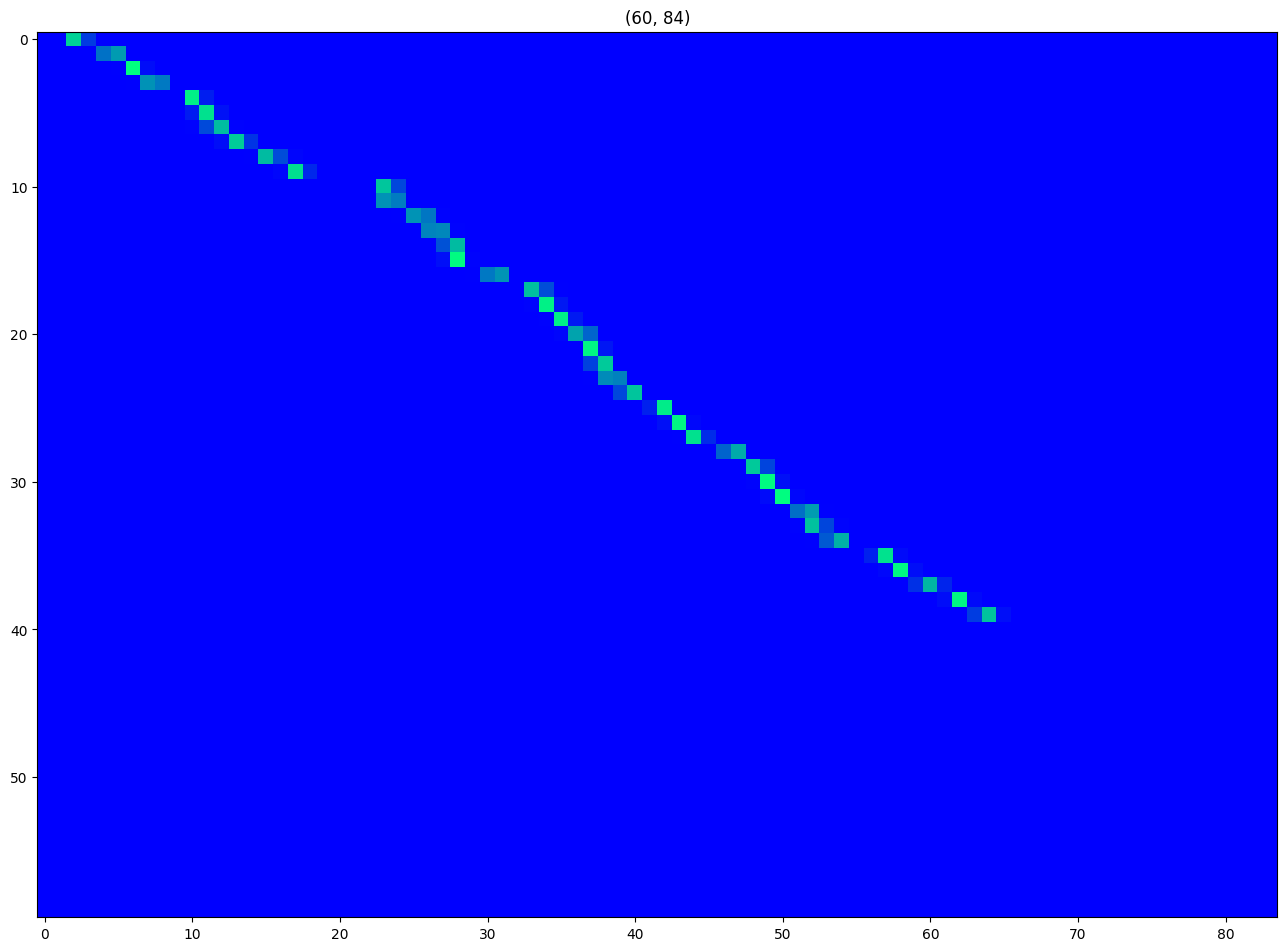


TRAIN/DR1/FCJF0/SI648
[  94.  135.  239.  342.  355.  390.  502.  585.  672.  752.  862.  908.
  958. 1027. 1051. 1209. 1240. 1332. 1405. 1454. 1506. 1581. 1626. 1726.
 1803. 1872. 1932. 2000. 2055. 2128. 2162. 2308. 2352. 2404. 2500. 2545.
 2579. 2601. 2647. 2721. 2841. 2915. 2937. 2968. 3036. 3208. 3310. 3413.
 3449. 3491. 3610.] (51,)
[  81.  143.  236.  340.  359.  391.  513.  585.  662.  748.  861.  906.
  961. 1025. 1048. 1213. 1246. 1336. 1403. 1450. 1504. 1584. 1626. 1727.
 1801. 1875. 1931. 2017. 2056. 2129. 2163. 2298. 2338. 2404. 2501. 2556.
 2580. 2597. 2652. 2720. 2845. 2918. 2941. 2966. 3036. 3212. 3315. 3412.
 3449. 3483.    0.] (51,)
[  13   -8    3    2   -4   -1  -11    0   10    4    1    2   -3    2
    3   -4   -6   -4    2    4    2   -3    0   -1    2   -3    1  -17
   -1   -1   -1   10   14    0   -1  -11   -1    4   -5    1   -4   -3
   -4    2    0   -4   -5    1    0    8 3610]
3.857142857142857
['pau', 'ah', 's', 'ey', 'l', 'v', 'ow', 'm', 'ey', 'hh', 'ae',

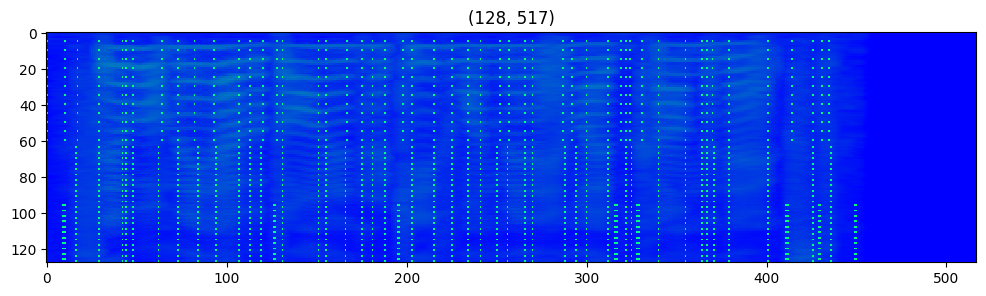

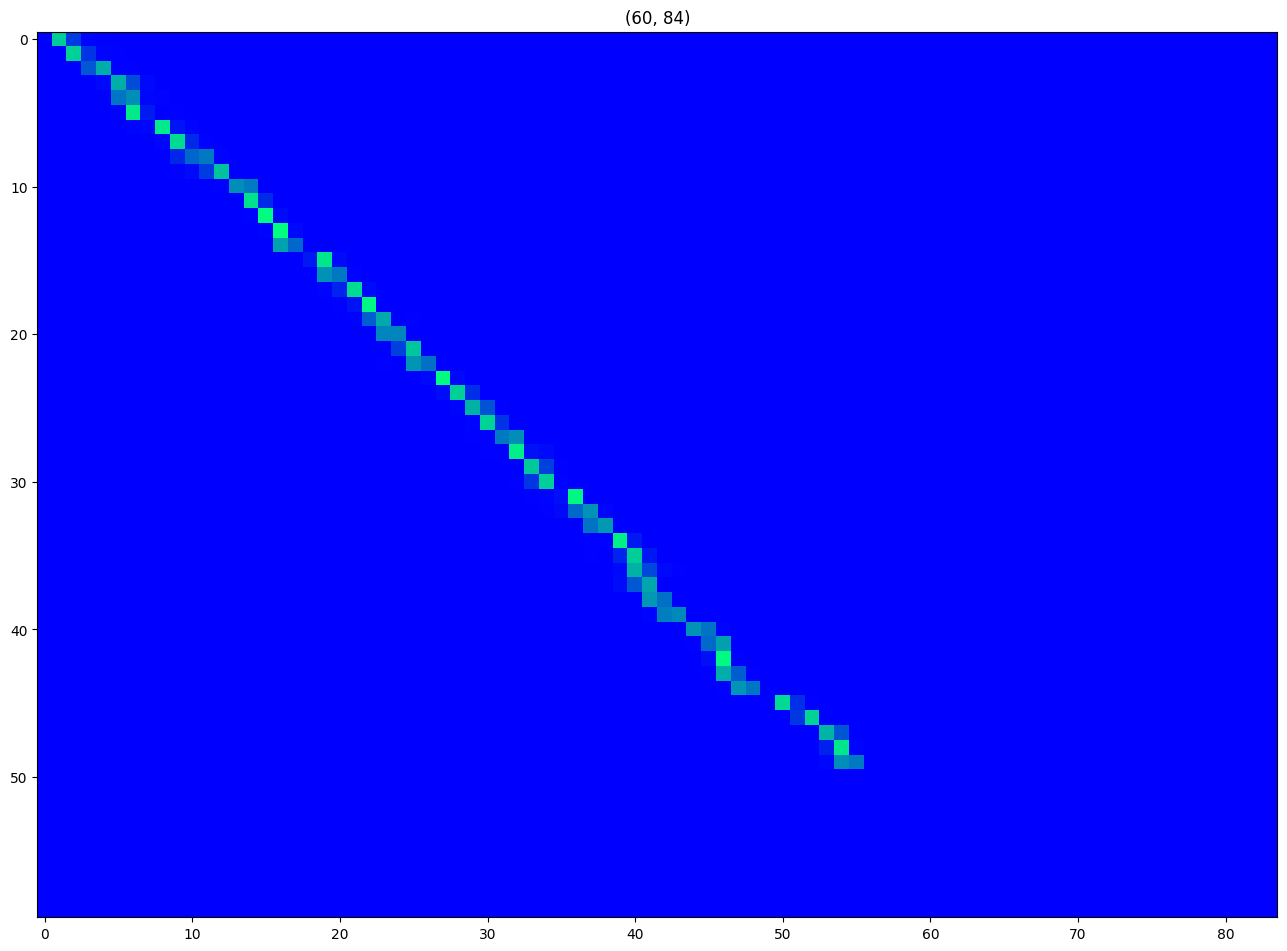

FileBatch[16]
	Audio[1958.0, 2246.0, 3123.0, 3046.0, 3072.0, 3078.0, 3437.0, 3142.0, 3277.0, 3354.0, 3565.0, 3539.0, 3789.0, 2778.0, 5306.0, 4134.0]
	Phoneme[21, 23, 26, 27, 31, 32, 36, 36, 37, 37, 37, 38, 40, 41, 56, 56]
	Word[5, 5, 6, 7, 8, 8, 11, 5, 9, 11, 10, 5, 11, 5, 16, 13]
	Output['output_timestamps']
torch.Size([16, 84891])
torch.Size([16, 56])

TRAIN/DR1/FCJF0/SX217
[ 180.  244.  312.  380.  418.  498.  548.  582.  600.  678.  728.  862.
  912. 1003. 1097. 1186. 1266. 1301. 1372. 1452. 1470. 1603. 1730.] (23,)
[ 175.  244.  313.  376.  418.  503.  554.  588.  652.  692.  732.  865.
  921. 1010. 1097. 1188. 1267. 1302. 1378. 1453. 1470. 1603.    0.] (23,)
[   5    0   -1    4    0   -5   -6   -6  -52  -14   -4   -3   -9   -7
    0   -2   -1   -1   -6   -1    0    0 1730]
6.0476190476190474
['pau', 'hh', 'aw', 'pau', 'p', 'er', 'm', 'ih', 'n', 'eh', 'n', 'aa', 'dh', 'eh', 'r', 'eh', 'pau', 'k', 'ih', 'pau', 'd', 'z', 'pau']


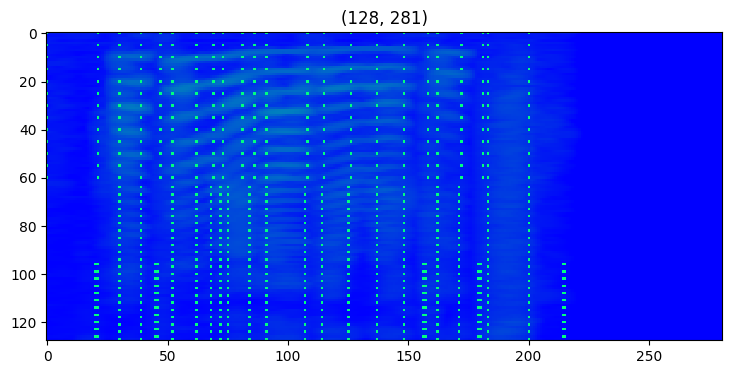

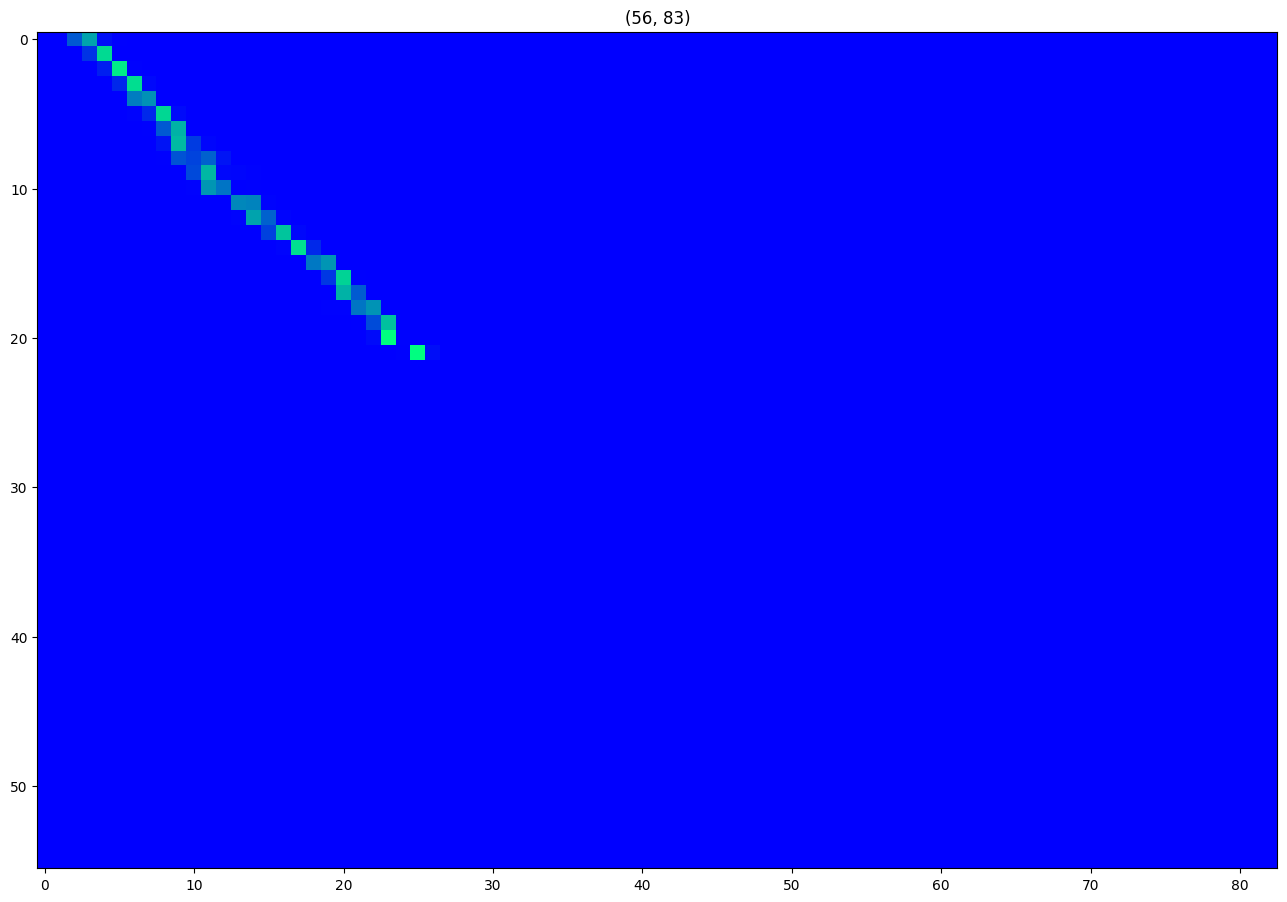


TRAIN/DR1/FDAW0/SX416
[ 148.  264.  321.  478.  521.  628.  689.  731.  875.  961. 1167. 1181.
 1272. 1326. 1406. 1486. 1574. 1608. 1692. 1760. 1888. 1959. 2031. 2292.
 2460. 2610.] (26,)
[ 151.  260.  322.  475.  520.  628.  689.  730.  882.  954. 1169. 1183.
 1278. 1331. 1410. 1492. 1577. 1618. 1699. 1784. 1887. 1959. 2031. 2293.
 2462.    0.] (26,)
[  -3    4   -1    3    1    0    0    1   -7    7   -2   -2   -6   -5
   -4   -6   -3  -10   -7  -24    1    0    0   -1   -2 2610]
4.083333333333333
['pau', 'ey', 'y', 'uw', 'pau', 'jh', 'pau', 'p', 'aw', 'er', 'aw', 'dx', 'ih', 'pau', 'jh', 'r', 'eh', 'r', 'l', 'iy', 'ah', 'pau', 'k', 'er', 's', 'pau']


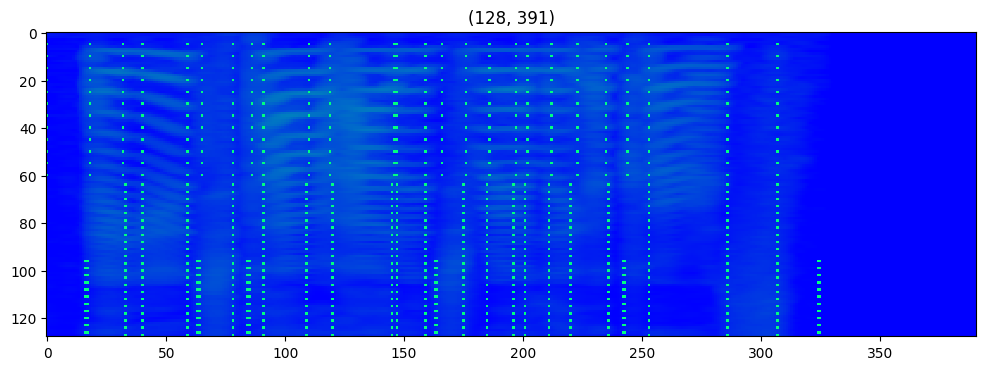

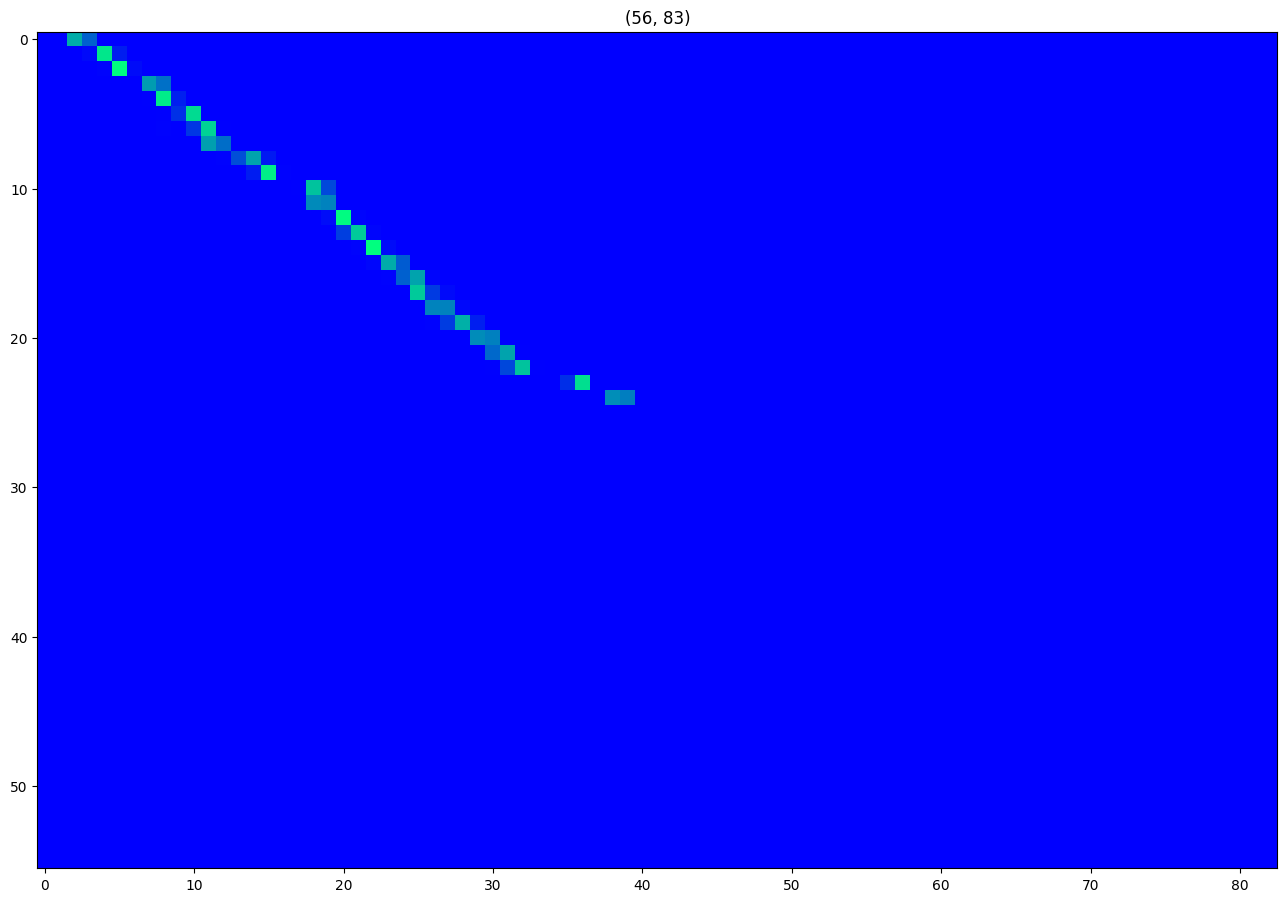


TRAIN/DR1/FDML0/SI1779
[ 134.  152.  272.  321.  441.  520.  602.  668.  752.  822.  988. 1068.
 1292. 1325. 1512. 1608. 1718. 1752. 1851. 1960. 1984. 2052. 2222. 2252.
 2272. 2350. 2530.] (27,)
[ 131.  153.  274.  323.  443.  524.  601.  666.  758.  817.  988. 1068.
 1292. 1352. 1507. 1604. 1716. 1754. 1856. 1961. 1983. 2044. 2221. 2250.
 2270. 2364.    0.] (27,)
[   3   -1   -2   -2   -2   -4    1    2   -6    5    0    0    0  -27
    5    4    2   -2   -5   -1    1    8    1    2    2  -14 2530]
3.52
['pau', 'dh', 'ey', 'y', 'uw', 'z', 'pau', 'p', 'iy', 'ng', 'pau', 't', 'ae', 'n', 'aa', 'pau', 'k', 'r', 'iy', 'm', 'pau', 'p', 'aw', 'pau', 'd', 'er', 'pau']


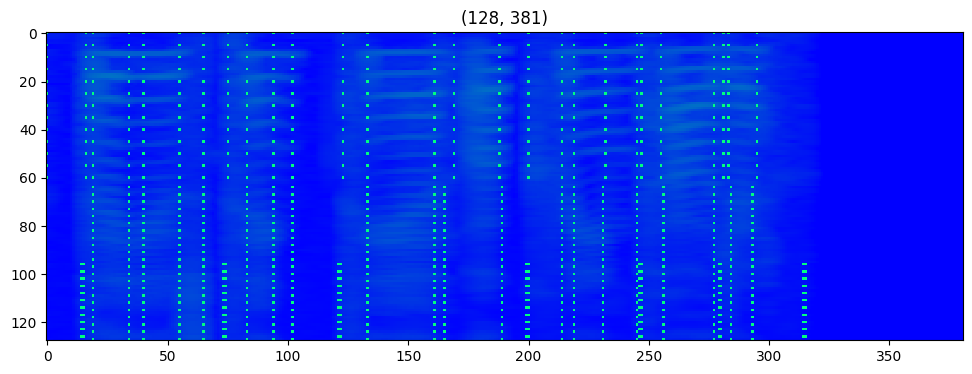

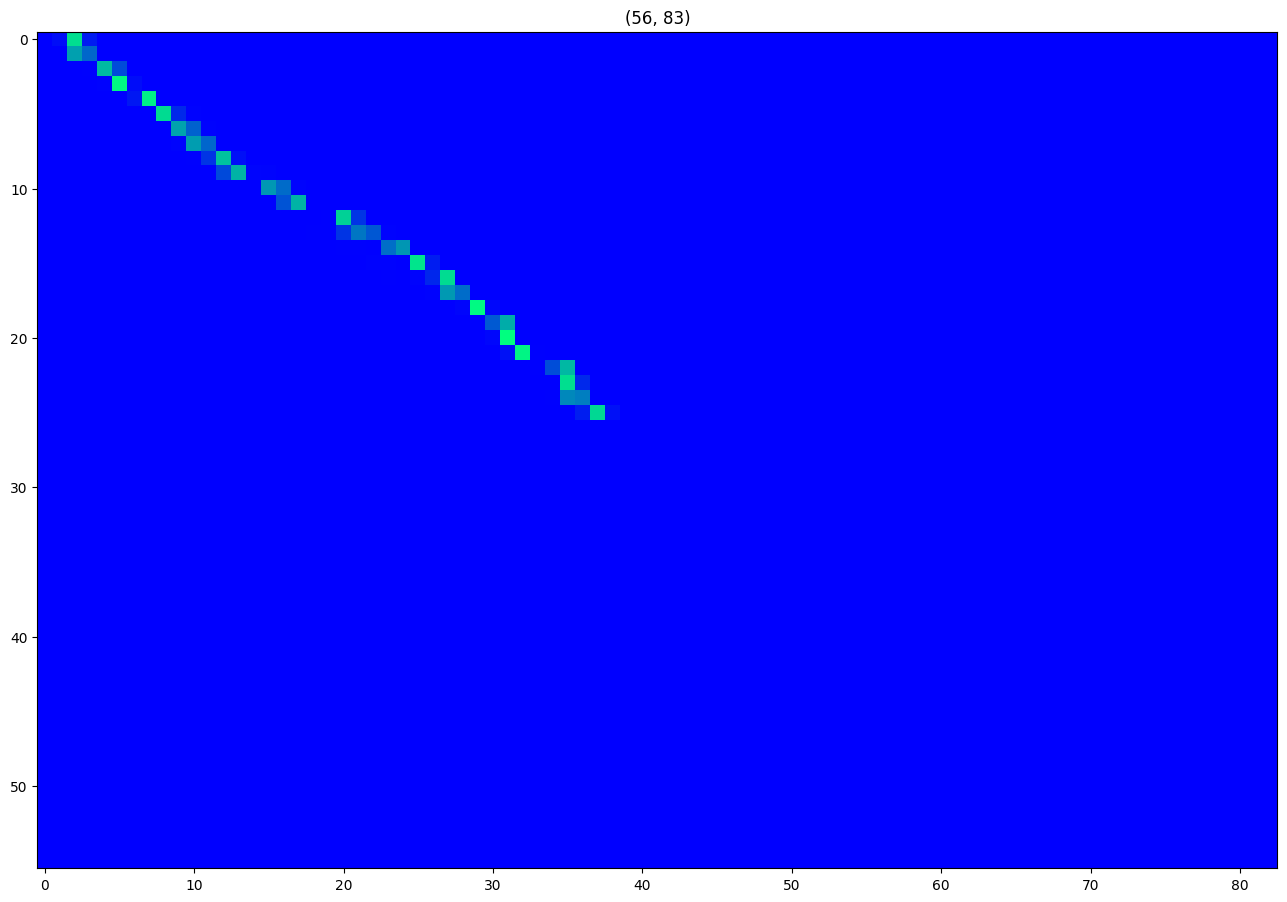


TRAIN/DR1/FDML0/SX69
[ 142.  222.  347.  394.  482.  648.  688.  822.  875. 1047. 1132. 1155.
 1285. 1358. 1438. 1509. 1555. 1563. 1632. 1694. 1732. 1794. 1852. 1892.
 1982. 2007. 2032. 2062. 2182. 2287. 2438. 2565.] (32,)
[ 141.  224.  316.  391.  484.  645.  690.  826.  875. 1047. 1130. 1151.
 1280. 1354. 1434. 1507. 1554. 1570. 1632. 1691. 1733. 1796. 1853. 1885.
 1960. 2009. 2032. 2061. 2185. 2289. 2441.    0.] (32,)
[   1   -2   31    3   -2    3   -2   -4    0    0    2    4    5    4
    4    2    1   -7    0    3   -1   -2   -1    7   22   -2    0    1
   -3   -2   -3 2565]
4.033333333333333
['pau', 'iy', 'y', 'er', 'r', 'ey', 'z', 'n', 'z', 'aw', 'pau', 'd', 'aa', 'r', 'z', 'ah', 'n', 'dh', 'ah', 'pau', 'p', 'aa', 'r', 'pau', 'ch', 's', 'pau', 't', 'eh', 'pau', 's', 'pau']


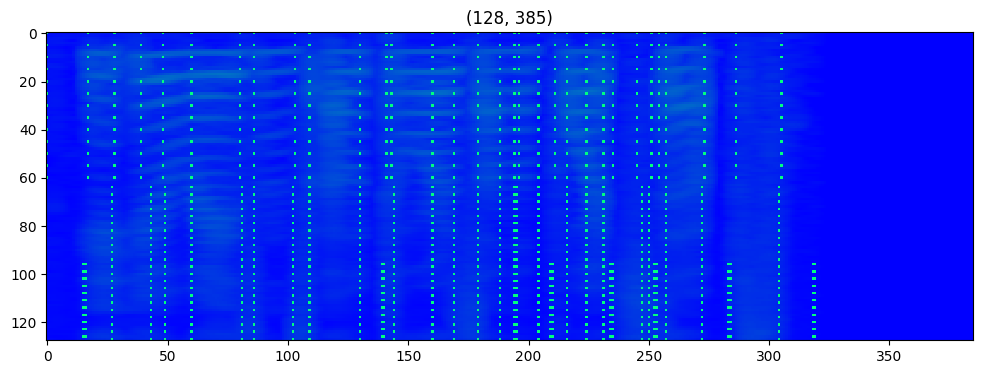

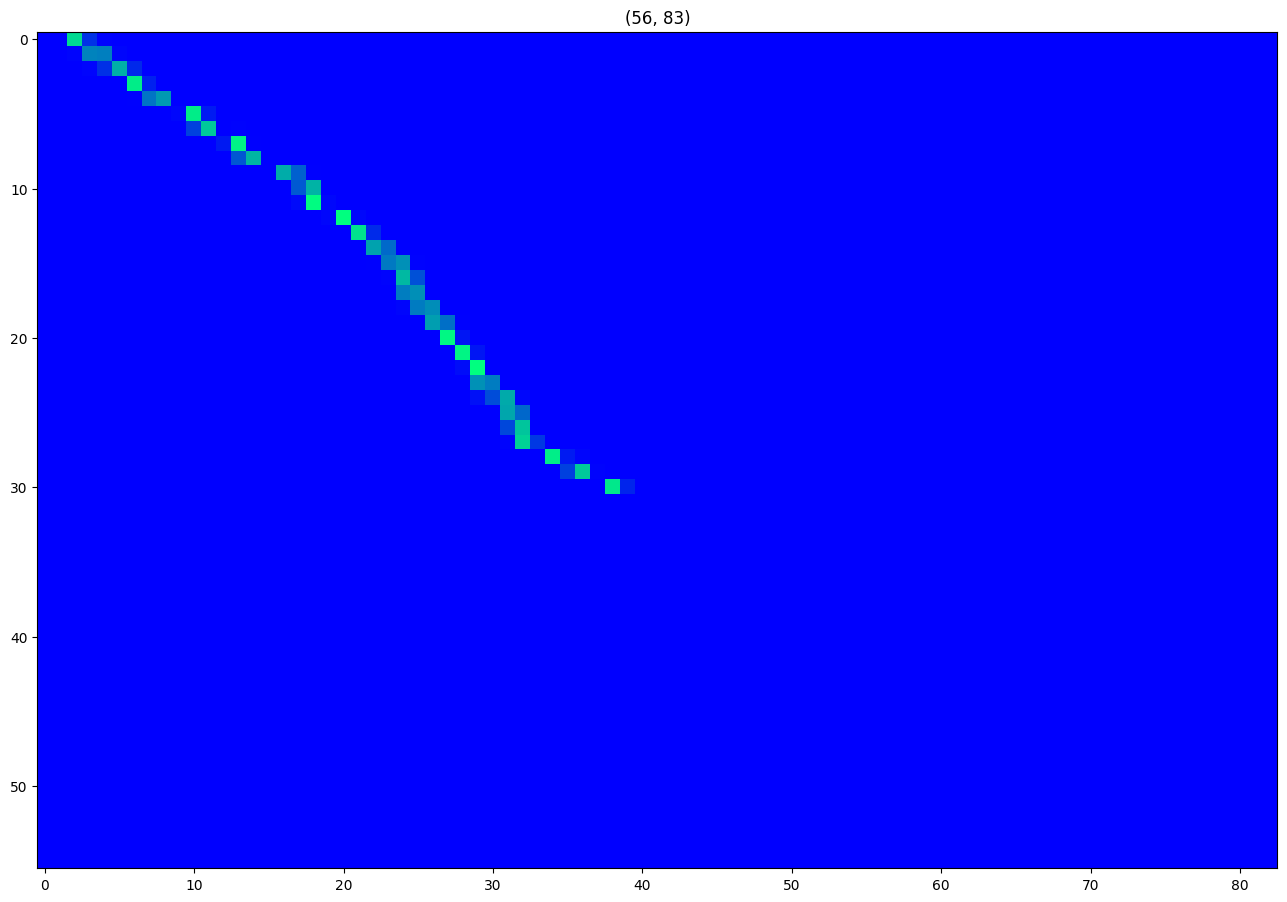


TRAIN/DR1/FCJF0/SA1
[ 191.  285.  358.  415.  548.  574.  646.  720.  781.  790.  920.  992.
 1021. 1130. 1276. 1410. 1432. 1454. 1514. 1598. 1697. 1754. 1854. 1982.
 2085. 2110. 2170. 2255. 2270. 2347. 2473. 2520. 2629. 2717. 2787. 2920.] (36,)
[ 191.  284.  354.  410.  547.  579.  645.  720.  774.  786.  921.  990.
 1009. 1128. 1279. 1407. 1431. 1450. 1506. 1596. 1698. 1749. 1851. 1983.
 2074. 2110. 2158. 2238. 2257. 2348. 2453. 2515. 2619. 2708. 2788.    0.] (36,)
[   0    1    4    5    1   -5    1    0    7    4   -1    2   12    2
   -3    3    1    4    8    2   -1    5    3   -1   11    0   12   17
   13   -1   20    5   10    9   -1 2920]
5.117647058823529
['pau', 'sh', 'ih', 'hh', 'eh', 'pau', 'jh', 'ih', 'pau', 'd', 'ah', 'pau', 'k', 's', 'uw', 'n', 'pau', 'g', 'r', 'ih', 's', 'ih', 'w', 'aa', 'sh', 'pau', 'w', 'aa', 'dx', 'er', 'aa', 'l', 'y', 'ih', 'er', 'pau']


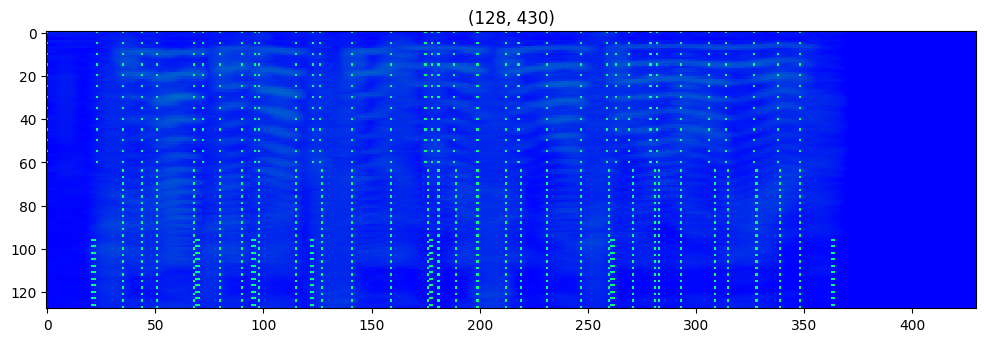

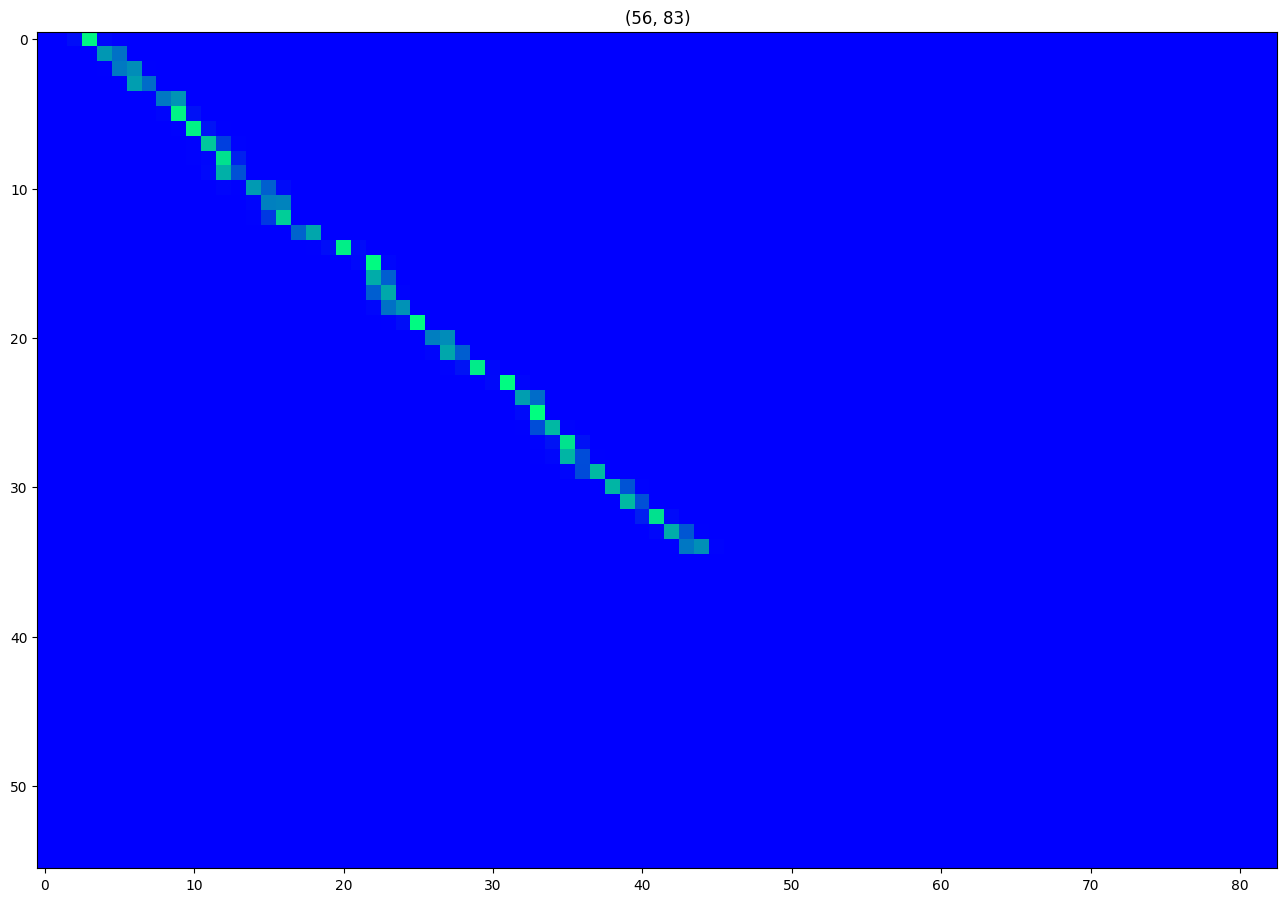


TRAIN/DR1/FCJF0/SI1657
[ 132.  201.  221.  283.  299.  379.  457.  512.  642.  768.  852.  888.
  958. 1055. 1152. 1241. 1313. 1439. 1525. 1624. 1747. 1810. 1845. 1871.
 1938. 2007. 2090. 2162. 2174. 2184. 2262. 2351. 2365. 2522. 2554. 2718.
 2835.] (37,)
[ 135.  194.  223.  282.  301.  396.  460.  515.  640.  765.  850.  888.
  967. 1063. 1152. 1237. 1331. 1441. 1529. 1623. 1742. 1803. 1840. 1870.
 1921. 2006. 2092. 2163. 2176. 2179. 2265. 2353. 2364. 2525. 2560. 2719.
    0.] (37,)
[  -3    7   -2    1   -2  -17   -3   -3    2    3    2    0   -9   -8
    0    4  -18   -2   -4    1    5    7    5    1   17    1   -2   -1
   -2    5   -3   -2    1   -3   -6   -1 2835]
4.3428571428571425
['pau', 'aa', 'r', 'pau', 'b', 'aa', 'r', 'ah', 's', 'm', 'ah', 'n', 'ih', 'f', 'm', 's', 'ah', 'w', 'ah', 'n', 'eh', 'ng', 'pau', 'g', 'ow', 'hh', 'ow', 'm', 'pau', 'b', 'ay', 'pau', 'b', 'ah', 'pau', 'th', 'pau']


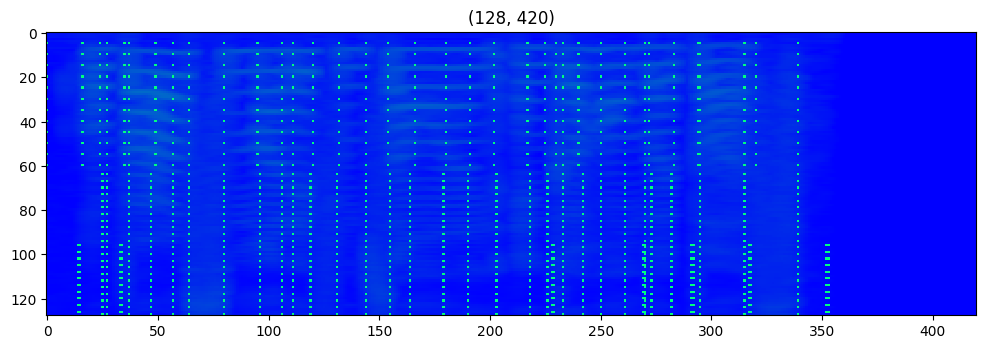

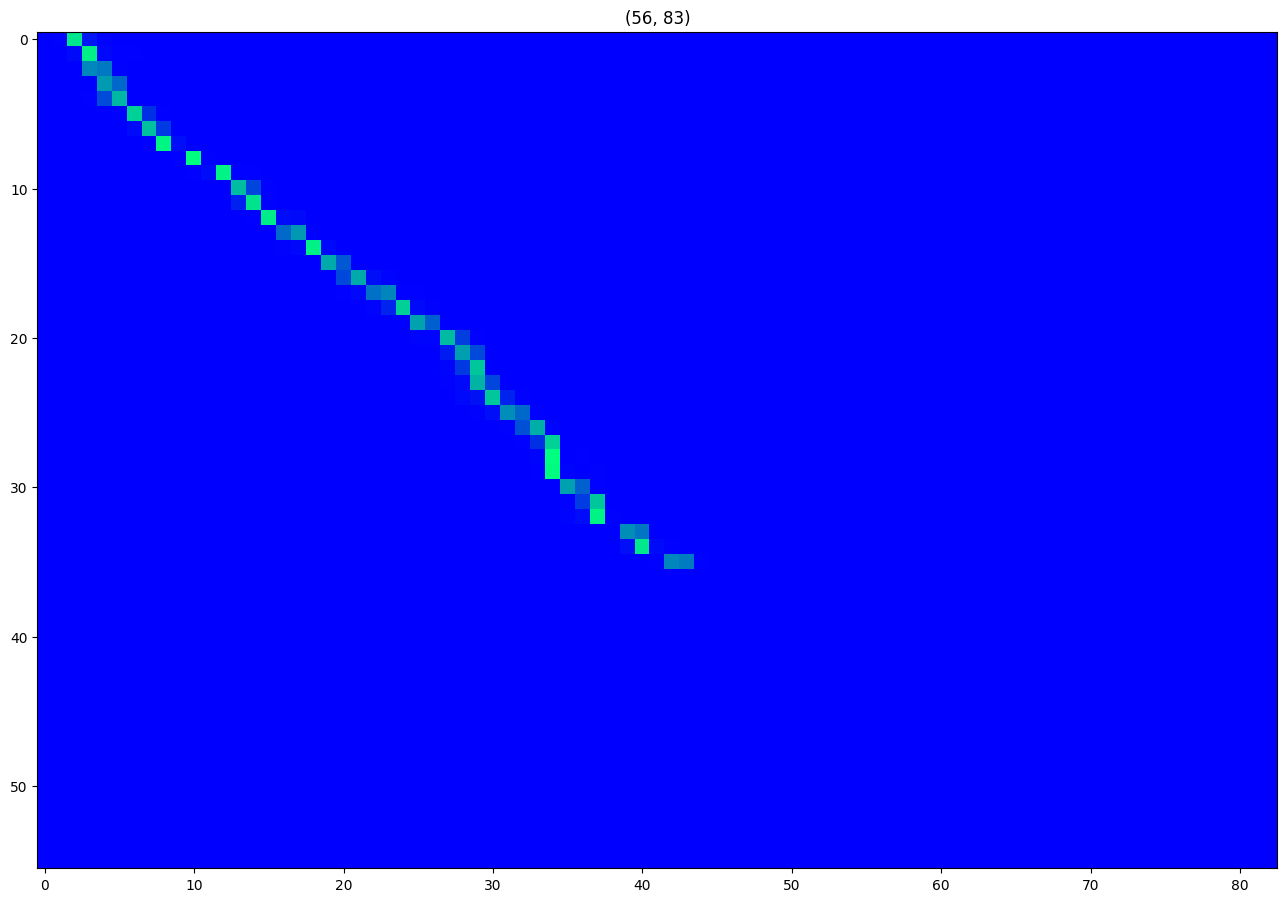


TRAIN/DR1/FECD0/SA2
[ 148.  189.  380.  413.  500.  682.  778.  814.  838.  892.  962. 1000.
 1012. 1062. 1134. 1209. 1258. 1352. 1454. 1504. 1546. 1744. 1812. 1893.
 2011. 2138. 2196. 2219. 2265. 2358. 2412. 2430. 2518. 2758. 2850. 2908.
 3050.] (37,)
[ 145.  190.  385.  420.  497.  682.  781.  814.  841.  888.  962.  998.
 1020. 1067. 1131. 1204. 1260. 1353. 1458. 1508. 1548. 1751. 1813. 1896.
 1995. 2137. 2194. 2217. 2260. 2361. 2415. 2434. 2514. 2758. 2857. 2899.
    0.] (37,)
[   3   -1   -5   -7    3    0   -3    0   -3    4    0    2   -8   -5
    3    5   -2   -1   -4   -4   -2   -7   -1   -3   16    1    2    2
    5   -3   -3   -4    4    0   -7    9 3050]
3.5142857142857142
['pau', 'd', 'ow', 'n', 'pau', 'ae', 's', 'pau', 'k', 'm', 'ih', 'pau', 't', 'uw', 'pau', 'k', 'eh', 'r', 'iy', 'ih', 'n', 'oy', 'l', 'iy', 'r', 'ae', 'pau', 'g', 'l', 'ay', 'pau', 'k', 'dh', 'ae', 'pau', 't', 'pau']


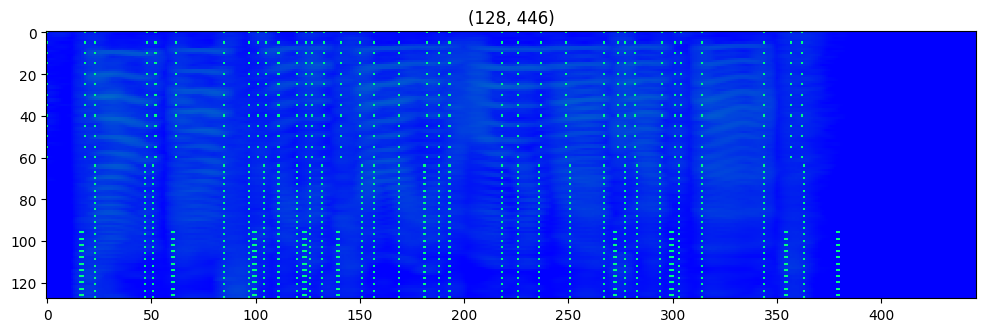

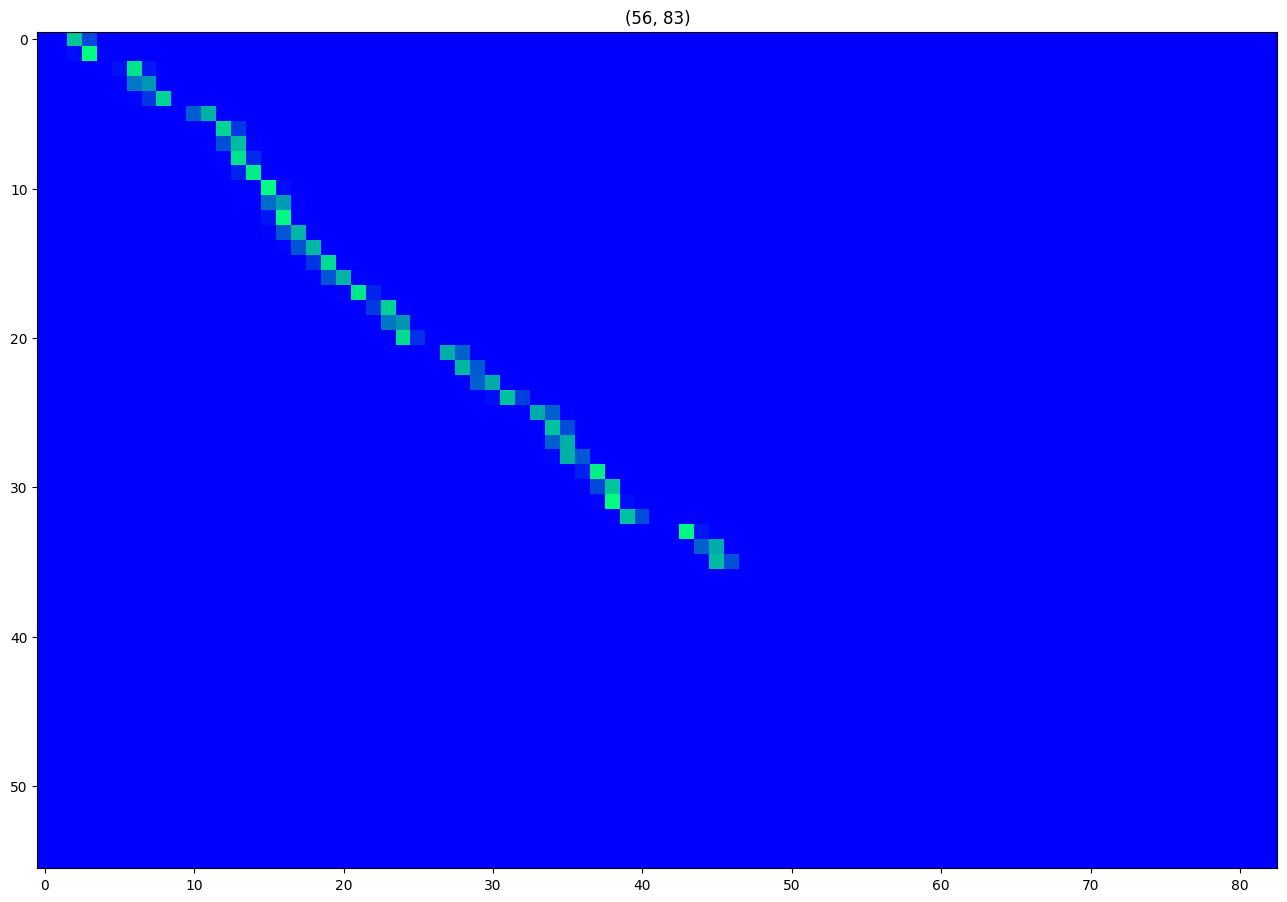


TRAIN/DR1/FDML0/SA1
[ 188.  308.  386.  420.  530.  585.  602.  627.  698.  773.  793.  867.
  942. 1012. 1042. 1152. 1285. 1379. 1394. 1524. 1546. 1585. 1627. 1708.
 1818. 1875. 1966. 2118. 2198. 2252. 2316. 2408. 2438. 2488. 2754. 2812.
 2918. 3057. 3154. 3275.] (40,)
[ 194.  306.  374.  405.  530.  584.  606.  632.  699.  773.  788.  897.
  947. 1007. 1041. 1149. 1286. 1375. 1397. 1523. 1546. 1585. 1621. 1711.
 1818. 1870. 1963. 2113. 2202. 2252. 2317. 2413. 2435. 2498. 2753. 2813.
 2920. 3058. 3146.    0.] (40,)
[  -6    2   12   15    0    1   -4   -5   -1    0    5  -30   -5    5
    1    3   -1    4   -3    1    0    0    6   -3    0    5    3    5
   -4    0   -1   -5    3  -10    1   -1   -2   -1    8 3275]
4.052631578947368
['pau', 'sh', 'iy', 'hh', 'ae', 'pau', 'd', 'y', 'er', 'pau', 'd', 'aa', 'r', 'pau', 'k', 's', 'uw', 'pau', 't', 'n', 'pau', 'g', 'r', 'iy', 's', 'iy', 'w', 'aa', 'sh', 'pau', 'w', 'aa', 'dx', 'ah', 'aa', 'l', 'y', 'ih', 'er', 'pau']


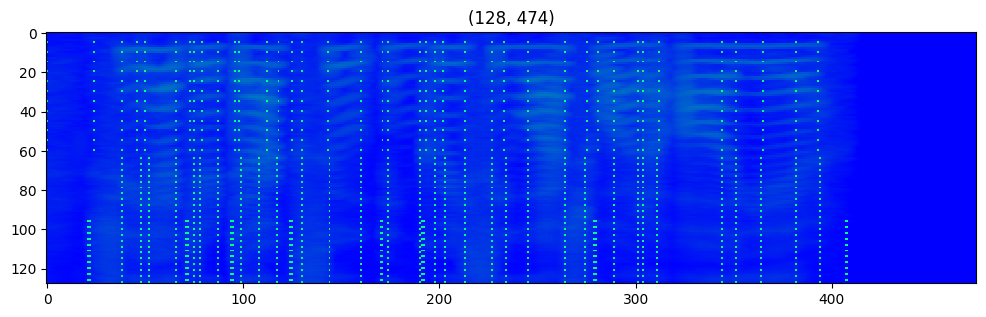

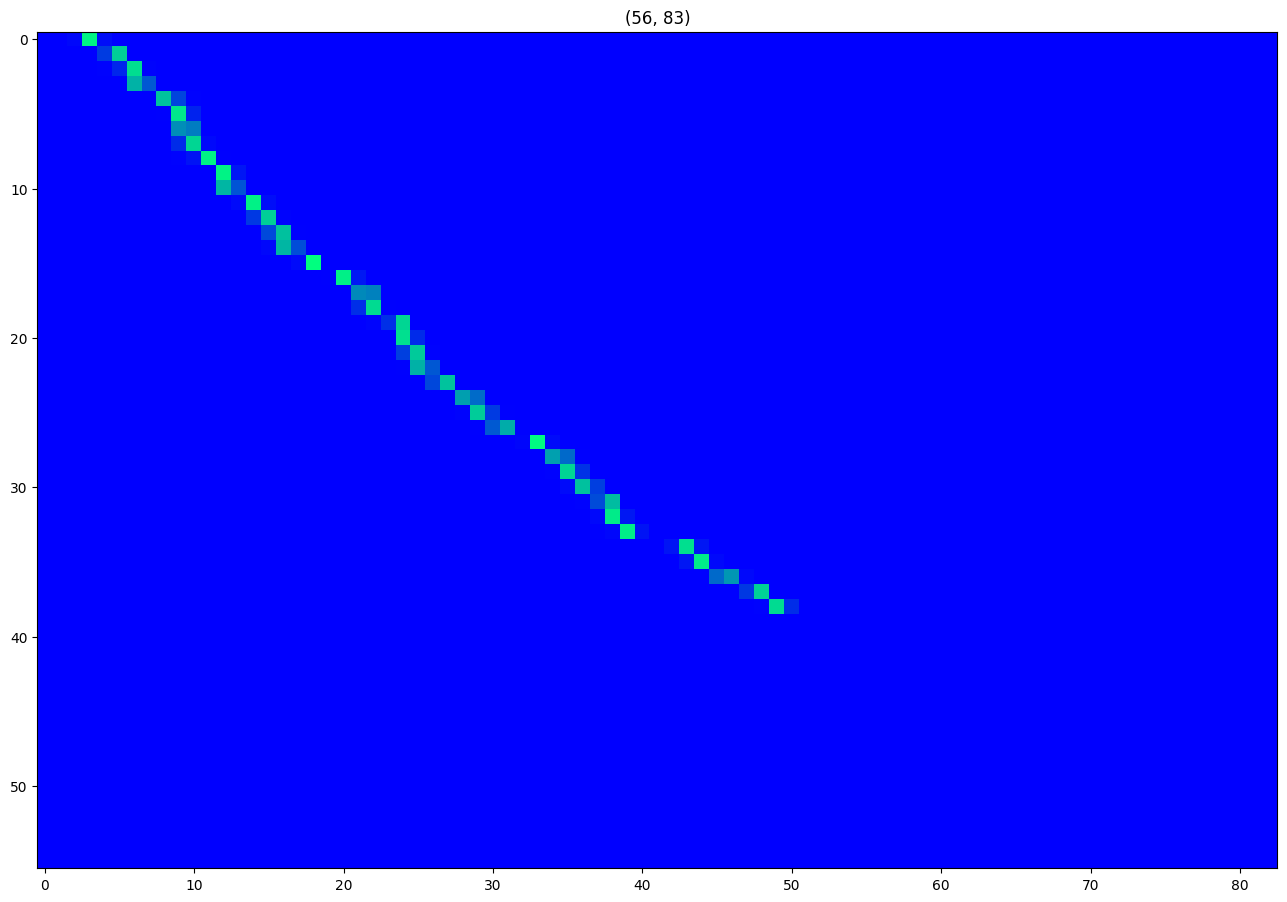


TRAIN/DR1/FDAW0/SI2036
[ 240.  349.  462.  505.  617.  681.  820.  868. 1009. 1055. 1298. 1437.
 1517. 1598. 1693. 1755. 1796. 1877. 1910. 1958. 2095. 2298. 2407. 2508.
 2548. 2585. 2630. 2707. 2762. 2889. 2935. 3011. 3084. 3117. 3152. 3193.
 3249. 3315. 3417. 3533. 3581. 3611. 3685. 3752. 3788. 3863. 3961. 4013.
 4050. 4136. 4252. 4295. 4324. 4550. 4638. 4794.] (56,)
[ 242.  348.  459.  505.  614.  679.  821.  870. 1004. 1054. 1299. 1434.
 1514. 1598. 1690. 1735. 1799. 1871. 1908. 1959. 2093. 2299. 2418. 2504.
 2566. 2590. 2628. 2706. 2758. 2888. 2935. 3009. 3079. 3113. 3152. 3201.
 3246. 3315. 3418. 3535. 3584. 3615. 3684. 3754. 3797. 3864. 3964. 4011.
 4052. 4138. 4255. 4294. 4319. 4548. 4626.    0.] (56,)
[  -2    1    3    0    3    2   -1   -2    5    1   -1    3    3    0
    3   20   -3    6    2   -1    2   -1  -11    4  -18   -5    2    1
    4    1    0    2    5    4    0   -8    3    0   -1   -2   -3   -4
    1   -2   -9   -1   -3    2   -2   -2   -3    1    5    2   12 4

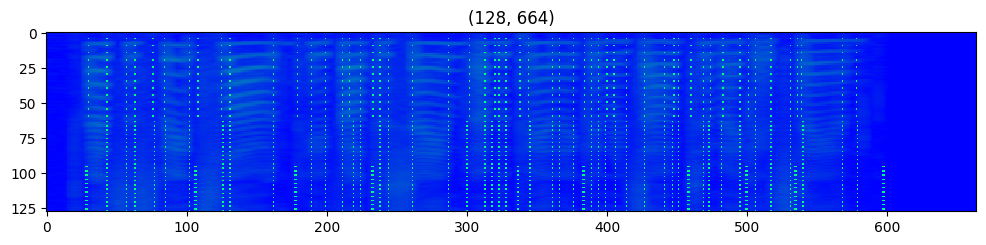

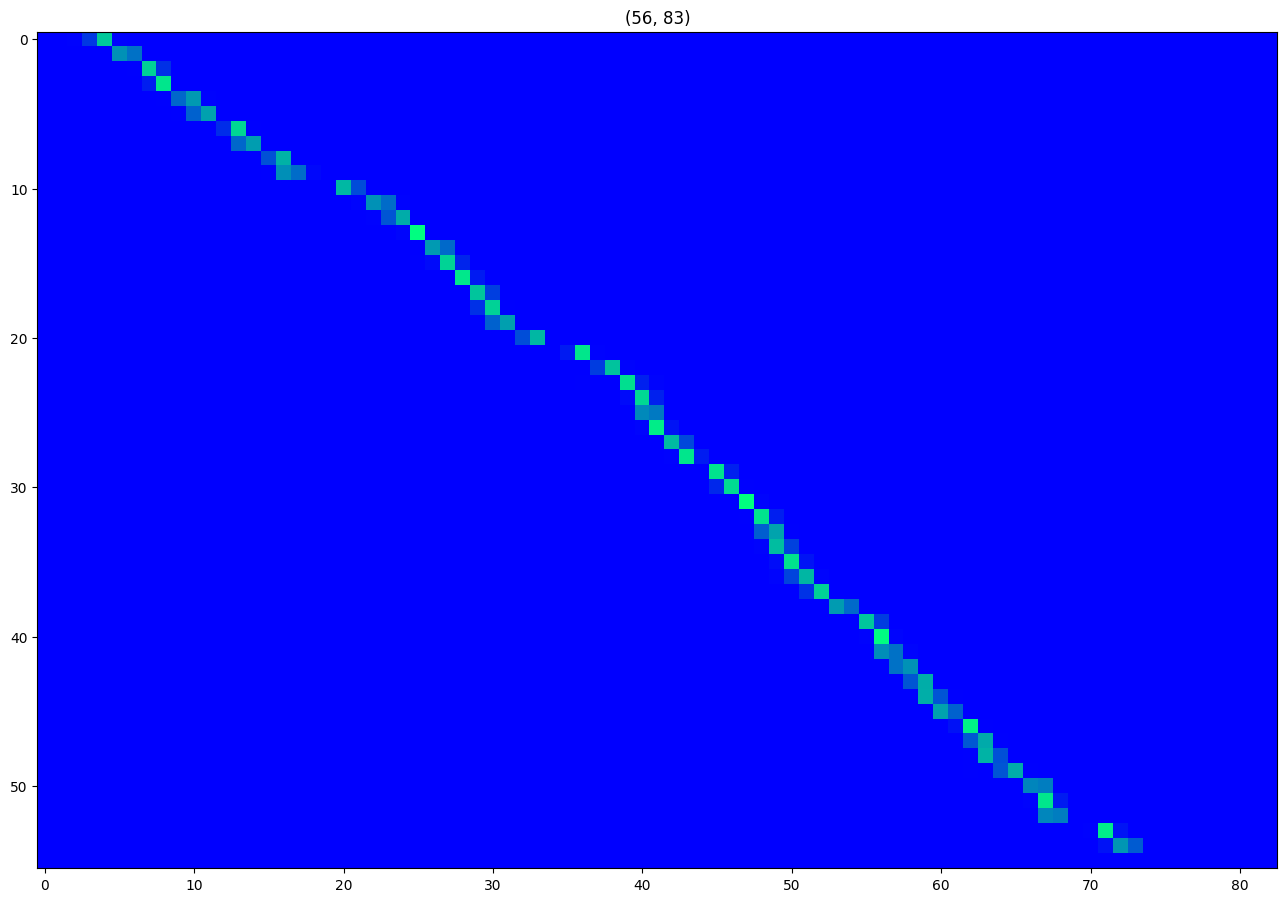


TRAIN/DR1/FDML0/SI1149
[ 139.  158.  192.  238.  302.  392.  448.  472.  598.  632.  652.  730.
  747.  859.  961. 1085. 1110. 1203. 1298. 1342. 1388. 1408. 1538. 1614.
 1668. 1686. 1786. 1843. 1869. 1885. 1956. 1982. 2089. 2118. 2162. 2208.
 2242. 2278. 2398. 2506. 2574. 2655. 2705. 2796. 2856. 2875. 2950. 3012.
 3071. 3209. 3222. 3302. 3412. 3478. 3548. 3620.] (56,)
[ 138.  159.  192.  234.  300.  391.  450.  470.  600.  635.  654.  731.
  771.  862.  958. 1084. 1109. 1198. 1289. 1342. 1384. 1409. 1536. 1613.
 1663. 1680. 1784. 1843. 1866. 1889. 1958. 1982. 2094. 2121. 2169. 2203.
 2235. 2280. 2398. 2506. 2573. 2655. 2715. 2792. 2858. 2878. 2947. 3013.
 3065. 3195. 3220. 3307. 3413. 3480. 3547.    0.] (56,)
[   1   -1    0    4    2    1   -2    2   -2   -3   -2   -1  -24   -3
    3    1    1    5    9    0    4   -1    2    1    5    6    2    0
    3   -4   -2    0   -5   -3   -7    5    7   -2    0    0    1    0
  -10    4   -2   -3    3   -1    6   14    2   -5   -1   -2    1 3

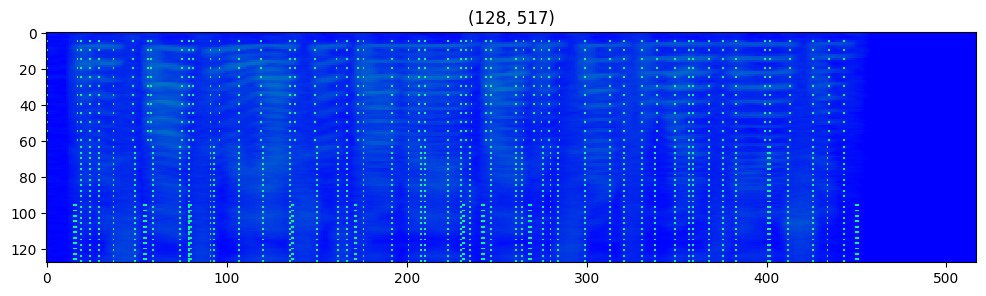

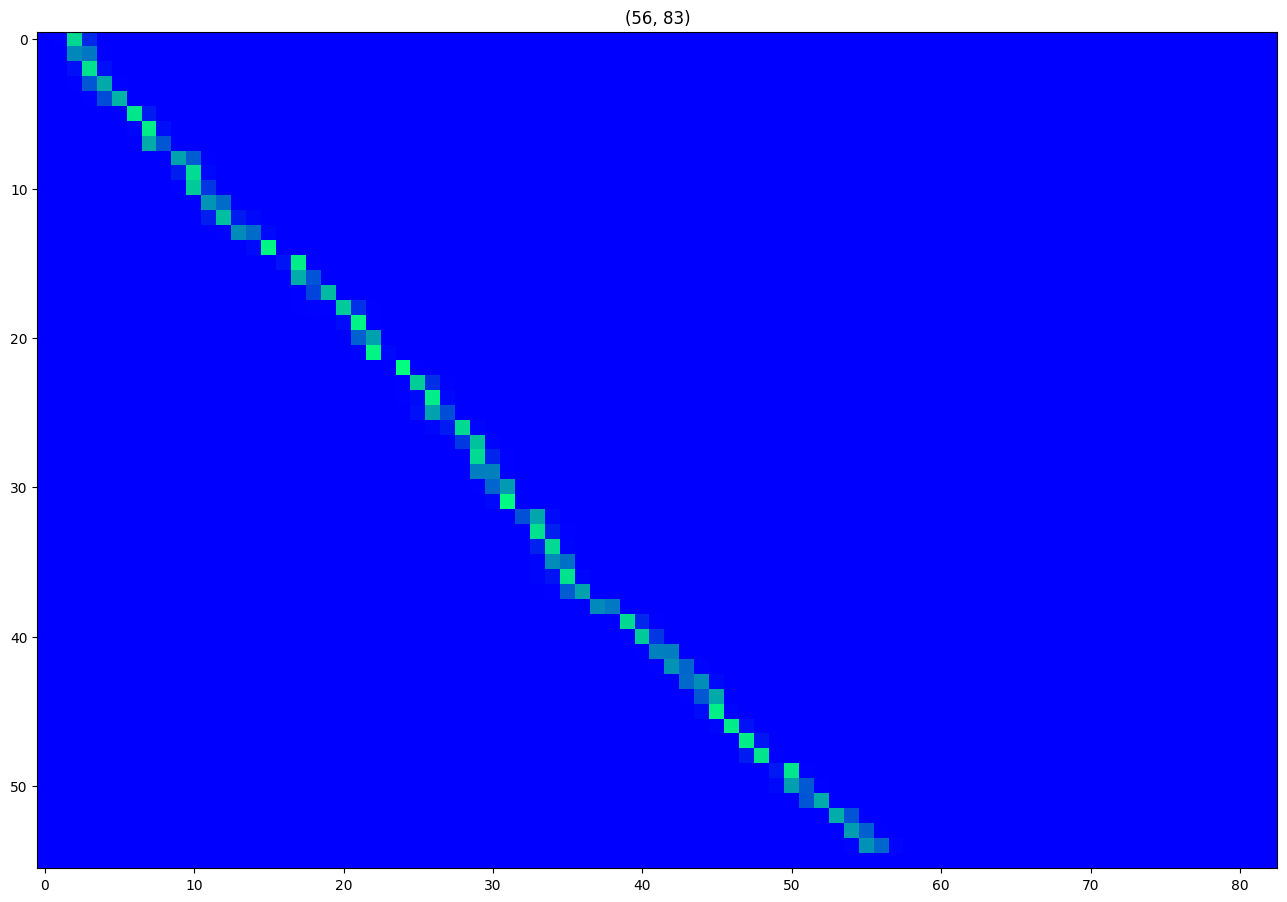

In [2]:
import torch
import numpy as np
from dataloading.dataset import UtteranceDataset
# from matplotlib import tight_layout
from dataloading import dto, loadz
from dataloading.utils import spectogram, show_tensor, hop_length
from spnz.model import Thing
import os

os.chdir(os.getcwd().split('/spnz')[0])
module = Thing.load_from_checkpoint("panns128.ckpt", strict=False)

print(hop_length)

def detach(tensor) -> np.ndarray:
    if hasattr(tensor, 'detach'): tensor = tensor.detach()
    if hasattr(tensor, 'cpu'): tensor = tensor.cpu()
    if hasattr(tensor, 'numpy'): tensor = tensor.numpy()
    tensor = tensor.copy()
    return tensor

def pad_audio(file: dto.File):
    return file.update(audio=np.pad(file.audio, [0, 8193]))

# module.history_size = 2

dataset = dto.wds_load(".data/train_data.tar.xz", limit=32)
dataset = dto.apply(dataset, pad_audio)
for batch in UtteranceDataset(dataset).batch(batch_size=16, mp=False):
    batch = module.with_gradient.forward(batch)
    print(batch)
    print(batch.audio.padded.shape)
    print(batch.phonetic_detail.stop.padded.shape)

    ids_phonemes = batch.phonetic_detail.id
    masks_phonemes = ids_phonemes.mask.clone()
    masks_phonemes[:, :-1] *= masks_phonemes[:, 1:].clone()
    masks_phonemes[:, -1] = False
    # print(masks_phonemes.shape, masks_phonemes[1].sum())

    ms_per_step = module.panns.ms_per_step
    target = batch.phonetic_detail.stop
    target_steps = (target.padded / ms_per_step).clone()
    target_floor = target_steps.floor()
    target_delta = target_steps - target_floor
    target_long = target_floor.unsqueeze(-1).to(torch.long).clip(min=0, max=batch.attention.shape[-1] - 1).clone()
    attention = batch.attention
    #
    # target_index_l = torch.dstack([target_long]).clip(min=0, max=attention.shape[-1] - 1)
    # target_index_r = torch.dstack([target_long + 1]).clip(min=0, max=attention.shape[-1] - 1)
    #
    # predicted_l = (torch.take_along_dim(attention, target_index_l, 2)).sum(axis=-1)
    # predicted_r = (torch.take_along_dim(attention, target_index_r, 2)).sum(axis=-1)
    #
    # diff = (predicted_r - target_delta).abs()
    # diff += (predicted_l + target_delta - 1).abs()
    # # diff = torch.log1p(diff)
    # # diff = (torch.log1p(predicted) - torch.log1p(target.padded)).abs()
    # # diff = diff.abs()
    # # diff = diff ** 2
    # loss = diff.sum() / masks_phonemes.sum()
    # print(loss)

    for i, item in enumerate(batch.original):
        item: dto.File


        actual, predicted = item.phonetic_detail.stop.round(), detach(item.output_timestamps).round()
        if abs(actual - predicted).astype(np.int32)[:-1].max() < 16:
            continue

        print()
        print(item.source)
        print(actual, actual.shape)
        print(predicted, predicted.shape)
        print((actual - predicted).astype(np.int32))

        print(abs(actual - predicted).astype(np.int32)[:-2].mean())
        print(item.phonetic_detail.utterance)
        logmel = spectogram(item.audio)

        val = logmel.max() * 10
        for word, stop_ms in zip(item.phonetic_detail.utterance, actual):
            stop_index = int(stop_ms / (hop_length / item.msr))
            if word == "pau":
                logmel[96::3, stop_index-2:stop_index] = val
            else:
                logmel[64::3, stop_index] = val

        for word, stop_ms in zip(item.phonetic_detail.utterance, predicted):
            logmel[:64:5, int(stop_ms / (hop_length / item.msr))] = val


        # for i_p, (i_a, i_f, i_d) in enumerate(zip(target_long[i].squeeze(-1).tolist(), target_steps[i].tolist(), target_delta[i].tolist())):
        #     dx = 0
        #     slice = detach(attention[i, i_p, max(i_a - dx, 0):i_a + 2 + dx])
        # #     # slice = slice / (slice.sum() + 0.000001)
        #     print(i_p, round(i_f, 2), slice.round(2), slice.sum().round(2))
        #     attention[i, i_p, ] = 0
        #     attention[i, i_p, i_a:i_a + 2] = torch.tensor(slice / (slice.sum() + 0.000001))

        show_tensor(logmel, limit=False, figsize=(12, 4))
        show_tensor(attention[i], limit=False)


